In [6]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

sys.path.append(os.path.abspath('../src/data'))
#from extract_for_model import extract_time_series
#from extract_for_model import scale_time_series
#from extract_for_model import scale_time_series_single

from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz  
from sklearn import preprocessing

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
#to do JeoJonson transformation
from scipy import stats

from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split



In [7]:
# Import required paths to input files
# Change the file to import if needed
from data_links import soft_pub_IS as pub_input_IS
from data_links import soft_pub_BS as pub_input_BS

from data_links import soft_prv_IS as prv_input_IS
from data_links import soft_prv_BS as prv_input_BS

In [8]:

wide_formatset=pd.read_csv(pub_input_IS)
wide_formatset2=pd.read_csv(pub_input_BS)


In [3]:
wide_formatset=pd.merge(wide_formatset, wide_formatset2, on=['company', 'date', 'year', 'quarter'])


In [4]:
wide_formatset.head()


,Unnamed: 0_x,company,date,year,quarter,IQ_COGS,IQ_EARNING_CO,IQ_EBIT,IQ_GP,IQ_INC_TAX,...,IQ_TOTAL_OPER_EXPEN,IQ_TOTAL_OTHER_OPER,IQ_TOTAL_REV,Unnamed: 0_y,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CL,IQ_TOTAL_EQUITY,IQ_TOTAL_LIAB_EQUITY
0,0,IQ1004737,2008-12-31,2008.0,Q4,22.063936,2.104717,4.715592,5.303545,1.095899,...,22.651888,0.587953,27.367480,0,51.364550,9.630161,142.18341,57.836143,55.959650,142.18341
1,1,IQ1004737,2009-03-31,2009.0,Q1,14.563921,0.618467,2.108508,2.304537,0.684867,...,14.759950,0.196029,16.868458,1,49.554430,10.013662,136.46553,54.277542,55.142475,136.46553
2,2,IQ1004737,2009-06-30,2009.0,Q2,13.151636,1.413540,1.924158,3.262878,0.549385,...,14.490357,1.338721,16.414515,2,36.559030,9.492742,130.94505,54.374250,50.143085,130.94505
3,3,IQ1004737,2009-09-30,2009.0,Q3,13.661301,0.811214,2.232436,3.100269,0.983639,...,14.529133,0.867833,16.761570,3,53.196686,11.082285,141.67612,58.466953,54.803406,141.67612
4,4,IQ1004737,2009-12-31,2009.0,Q4,18.660190,1.621412,3.819487,5.958694,1.419587,...,20.799398,2.139208,24.618883,4,54.929703,12.275393,141.91211,61.115734,54.706380,141.91211


In [5]:
wide_formatset.describe()

,Unnamed: 0_x,year,IQ_COGS,IQ_EARNING_CO,IQ_EBIT,IQ_GP,IQ_INC_TAX,IQ_NET_INTEREST_EXP,IQ_OPER_INC,IQ_OTHER_OPER,IQ_TOTAL_OPER_EXPEN,IQ_TOTAL_OTHER_OPER,IQ_TOTAL_REV,Unnamed: 0_y,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CL,IQ_TOTAL_EQUITY,IQ_TOTAL_LIAB_EQUITY
count,15695.00000,15695.000000,15052.000000,15693.000000,15681.000000,15418.000000,13098.000000,15010.000000,15681.000000,10852.000000,15679.000000,15565.000000,15349.000000,15695.000000,14766.000000,14050.000000,15305.000000,15280.000000,15695.000000,15306.000000
mean,8253.47187,2013.049888,42.944439,5.274180,8.245461,24.382950,2.273443,-0.358410,8.245461,1.944192,56.957780,15.845760,66.606171,8018.590315,63.064071,77.796135,291.960748,100.174800,127.258393,291.941673
std,4754.73186,4.125052,242.520690,49.558242,67.678890,172.337304,18.074157,3.881150,67.678890,18.238730,316.562440,106.486790,380.634981,4623.602048,325.409259,854.261268,1776.834151,537.525609,889.710237,1776.777670
min,0.00000,1995.000000,-146.820160,-295.301270,-382.351930,-301.469120,-121.689920,-270.400300,-382.351930,-240.463350,-64.807755,-329.443270,-64.661670,0.000000,0.000000,-719.567440,0.000985,-0.443852,-499.126980,0.000000
25%,4127.50000,2011.000000,0.558905,-0.183500,-0.117712,0.348546,-0.001326,-0.088500,-0.117712,-0.021600,1.273000,0.389450,1.286000,4019.500000,1.263017,-3.386852,5.977979,1.878136,2.300185,5.975206
50%,8263.00000,2014.000000,2.747500,0.095776,0.172753,1.576211,0.063630,-0.010142,0.172753,0.040594,4.586071,1.320500,4.885506,8011.000000,4.717000,0.512000,20.472382,6.943191,10.027875,20.468688
75%,12393.50000,2016.000000,12.305096,0.856234,1.319870,5.769851,0.425665,0.002960,1.319870,0.806508,18.095294,4.309577,19.834436,12021.500000,18.611448,7.481652,78.281280,26.727000,35.887690,78.256000
max,16406.00000,2018.000000,5726.059000,1649.737500,1769.729500,4683.045400,553.377300,63.469944,1769.729500,558.258000,7033.294000,2913.316000,8309.657000,16028.000000,6286.225600,24620.799000,46256.414000,10800.612000,25941.360000,46256.414000


In [6]:
wide_formatset.columns

Index(['Unnamed: 0_x', 'company', 'date', 'year', 'quarter', 'IQ_COGS',
       'IQ_EARNING_CO', 'IQ_EBIT', 'IQ_GP', 'IQ_INC_TAX',
       'IQ_NET_INTEREST_EXP', 'IQ_OPER_INC', 'IQ_OTHER_OPER',
       'IQ_TOTAL_OPER_EXPEN', 'IQ_TOTAL_OTHER_OPER', 'IQ_TOTAL_REV',
       'Unnamed: 0_y', 'IQ_AR', 'IQ_RE', 'IQ_TOTAL_ASSETS', 'IQ_TOTAL_CL',
       'IQ_TOTAL_EQUITY', 'IQ_TOTAL_LIAB_EQUITY'],
      dtype='object')

In [7]:
##here starts the regression for each company



min_year=2012
wide_formatset=wide_formatset[wide_formatset.year>min_year]
wide_formatset=wide_formatset[wide_formatset.year<2019]
print(len(wide_formatset.company.unique()))
print(wide_formatset.company.unique())

#dataset for the regression

set_reg=wide_formatset.loc[:, ('company','date','year','quarter','IQ_EBIT', 'IQ_TOTAL_REV', 'IQ_TOTAL_OTHER_OPER')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

514
['IQ1004737' 'IQ100546355' 'IQ100842126' 'IQ10214670' 'IQ1027520'
 'IQ1028801' 'IQ10320771' 'IQ1034090' 'IQ10361568' 'IQ1047789'
 'IQ10580417' 'IQ1059156' 'IQ1063939' 'IQ1067539' 'IQ10816673'
 'IQ108544096' 'IQ11112316' 'IQ111627254' 'IQ11211822' 'IQ11253735'
 'IQ11253822' 'IQ113354243' 'IQ114340051' 'IQ11515945' 'IQ115833865'
 'IQ115898434' 'IQ11672047' 'IQ1170872' 'IQ1173571' 'IQ117542163'
 'IQ118755593' 'IQ11920836' 'IQ1222537' 'IQ123214' 'IQ1239178' 'IQ124507'
 'IQ12504366' 'IQ125964' 'IQ126218' 'IQ126475' 'IQ126979367' 'IQ12703265'
 'IQ12762127' 'IQ127751764' 'IQ128534719' 'IQ129198892' 'IQ130202001'
 'IQ130412190' 'IQ131252193' 'IQ13186617' 'IQ132105676' 'IQ13229475'
 'IQ132688589' 'IQ133434203' 'IQ133674346' 'IQ133827444' 'IQ134733464'
 'IQ135194' 'IQ135285' 'IQ1352992' 'IQ1353005' 'IQ1355175' 'IQ135538'
 'IQ135688' 'IQ13648841' 'IQ13720272' 'IQ1376045' 'IQ137820' 'IQ138820984'
 'IQ138891248' 'IQ139653' 'IQ140453992' 'IQ140988979' 'IQ141249'
 'IQ141929052' 'IQ142022' 'IQ1422

In [8]:
set_reg.head()

,company,date,year,quarter,IQ_EBIT,IQ_TOTAL_REV,IQ_TOTAL_OTHER_OPER
16,IQ1004737,2013-03-31,2013.0,Q1,1.371334,24.245708,1.712648
17,IQ1004737,2013-06-30,2013.0,Q2,1.250708,26.602600,1.542227
18,IQ1004737,2013-09-30,2013.0,Q3,2.067693,26.356775,1.705344
19,IQ1004737,2013-12-31,2013.0,Q4,2.937156,30.630005,4.861440
20,IQ1004737,2014-03-31,2014.0,Q1,0.819894,25.452387,1.201428


In [9]:
set_reg.groupby(['year','quarter']).size()

year    quarter
2013.0  Q1         331
        Q2         306
        Q3         326
        Q4         334
2014.0  Q1         352
        Q2         343
        Q3         348
        Q4         353
2015.0  Q1         379
        Q2         356
        Q3         376
        Q4         385
2016.0  Q1         409
        Q2         389
        Q3         395
        Q4         408
2017.0  Q1         437
        Q2         410
        Q3         422
        Q4         443
2018.0  Q1         471
        Q2         457
        Q3         450
        Q4         455
dtype: int64

In [10]:
#set_reg['month']=set_reg.quarter.str.extract('(\d+)')

set_reg['date'] = pd.to_datetime(set_reg['date'])
set_reg['date2']=set_reg['date'].map(dt.datetime.toordinal)

set_reg["rank"] = set_reg.groupby("company")["date2"].rank("dense", ascending=True)
set_reg
#set_reg[int(s) for s in set_reg[['quarter']].split() if s.isdigit()]

,company,date,year,quarter,IQ_EBIT,IQ_TOTAL_REV,IQ_TOTAL_OTHER_OPER,date2,rank
16,IQ1004737,2013-03-31,2013.0,Q1,1.371334,24.245708,1.712648,734958,1.0
17,IQ1004737,2013-06-30,2013.0,Q2,1.250708,26.602600,1.542227,735049,2.0
18,IQ1004737,2013-09-30,2013.0,Q3,2.067693,26.356775,1.705344,735141,3.0
19,IQ1004737,2013-12-31,2013.0,Q4,2.937156,30.630005,4.861440,735233,4.0
20,IQ1004737,2014-03-31,2014.0,Q1,0.819894,25.452387,1.201428,735323,5.0
21,IQ1004737,2014-06-30,2014.0,Q2,1.465513,28.680128,1.497839,735414,6.0
22,IQ1004737,2014-09-30,2014.0,Q3,2.408262,26.473104,1.289644,735506,7.0
23,IQ1004737,2014-12-31,2014.0,Q4,3.888034,33.484314,3.575317,735598,8.0
24,IQ1004737,2015-03-31,2015.0,Q1,0.886342,24.477922,0.980421,735688,9.0
25,IQ1004737,2015-06-30,2015.0,Q2,2.682166,26.421510,-1.623996,735779,10.0


In [11]:
set_reg3=set_reg
set_reg3['IQ_EBIT_PERC']=0
set_reg3['IQ_TOTAL_REV_PERC']=0
set_reg3['IQ_TOTAL_OTHER_OPER_PERC']=0
  
for i in set_reg.company.unique():
    selected_data=set_reg[set_reg.company==i]
    if len(selected_data.company)>1:
        max_rank=int(max(selected_data['rank']))
        for j in range(2, max_rank+1,1):
            if (float(selected_data.IQ_EBIT[selected_data['rank']==j-1]))!=0:
                set_reg3.IQ_EBIT_PERC[(set_reg3['company']==i) & (set_reg3['rank']==j)]=(float(((selected_data.IQ_EBIT[selected_data['rank']==(j)]))-float(selected_data.IQ_EBIT[selected_data['rank']==(j-1)])) /float((selected_data.IQ_EBIT[selected_data['rank']==(j-1)])) )    
            if (float(selected_data.IQ_TOTAL_REV[selected_data['rank']==j-1]))!=0:
                set_reg3.IQ_TOTAL_REV_PERC[(set_reg3['company']==i) & (set_reg3['rank']==j)]=(float(((selected_data.IQ_TOTAL_REV[selected_data['rank']==(j)]))-float(selected_data.IQ_TOTAL_REV[selected_data['rank']==(j-1)])) /float((selected_data.IQ_TOTAL_REV[selected_data['rank']==(j-1)])) )    
            if (float(selected_data.IQ_TOTAL_OTHER_OPER[selected_data['rank']==j-1]))!=0:
                set_reg3.IQ_TOTAL_OTHER_OPER_PERC[(set_reg3['company']==i) & (set_reg3['rank']==j)]=(float(((selected_data.IQ_TOTAL_OTHER_OPER[selected_data['rank']==(j)]))-float(selected_data.IQ_TOTAL_OTHER_OPER[selected_data['rank']==(j-1)])) /float((selected_data.IQ_TOTAL_OTHER_OPER[selected_data['rank']==(j-1)])) )   
   
    


/home/lus_karol/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/lus_karol/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/lus_karol/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/lus_karol/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:12:

KeyboardInterrupt: 

In [ ]:
#import functions that reshape the data for time series

def filter_features(*,df,features):
    """
    Function retains selected features.
    """
    if isinstance(features,list):
        features_extended = ['company','year','quarter']
        features_extended = features_extended + features
        
        df = df[features_extended]
    else:
        print("There is something wrong with your features list.")
        print("Must be a list or None.")
        return 1
    return df

def filter_IDs(*,df,ids):
    """
    Function retrains selected companies IDs.
    If None passed all IDs are retained.
    """
    if ids == None:
        pass
    else:
        mask_ID = (df['company'].isin(ids))
        df = df[mask_ID]
    return df

def time_series_reshape(*,df,features,steps,norm,no_shift):
    """
    Function reshapes the time-series.
    """
    time_series_df= []
    
    for company in df['company'].unique():
        temp_df = df[df['company']==company].copy()
       
        
        # Filter out empty datasets
        temp_df = temp_df.dropna()
        if temp_df.empty:
            continue
        
        """ Drop NA and normalize before reshaping """
        if norm == True:
            temp_df = normalzie(df = temp_df, feat_to_norm = features)
        if no_shift == False:
            for t in range(-steps,2):
                for feature in features:
                
                    if t < 0:
                        temp_df[feature+str(t)] = temp_df[feature].shift(-1*t)
               
                    if t >= 0:
                        temp_df[feature+'+'+str(t)] = temp_df[feature].shift(-1*t)
                
        
            for feature in features:
                del temp_df[feature]
            
        time_series_df.append(temp_df)
    time_series_df = pd.concat(time_series_df, axis = 0, ignore_index=True) 
    
    return time_series_df

def extract_time_series(*,input_path,\
                          features = None,\
                          ids      = None,\
                          year_min = 2012,\
                          no_shift = False,\
                          steps    = 1,\
                          norm     = False,\
                          no_test  = False,\
                          quarterly= False):
    """
    Extracts data from the interim data frame for subsequent modelling.
    """
    
    source_csv = pd.read_csv(input_path)

    """ Filter out selected features """
    source_csv = filter_features(df=source_csv,features=features)
    
    """ Filter out selected company IDs """
    source_csv = filter_IDs(df=source_csv,ids=ids)
    
    if not quarterly:
        """ Retain only one quarer per year. Choose Q4 if possible """
        source_csv = source_csv[~source_csv.duplicated(['company','year'],keep='last')]    
        shape_init = source_csv.shape
    else:
        source_csv = source_csv[~source_csv.duplicated(['company','year','quarter'],keep='last')]    
        shape_init = source_csv.shape        
    
    """ Reshape the time-series """
    time_series_df = time_series_reshape(df=source_csv,features=features,steps=steps,norm=norm,no_shift=no_shift)    
    time_series_df = time_series_df.dropna()
    shape_after_reshape = time_series_df.shape
    """ Filter out entries that are too old"""
    mask_year      = (time_series_df['year']>=year_min)
    time_series_df = time_series_df[mask_year]     
   
    """ Filter out companies that appear only once """
    comp_b4_single = time_series_df.company.unique().size
    time_series_df = time_series_df[time_series_df.groupby('company').company.transform(len) > 1]
    comp_after_single = time_series_df.company.unique().size          
    
    if not no_test:
        """ Get test dataset by taking the last entry for each company"""
        test_df = time_series_df.groupby('company').tail(1)
        
        percentage = test_df.shape[0]/time_series_df.shape[0]*100
    
    
        """ Get training set as a symmetric difference between all and test set """
        train_df = pd.concat([time_series_df,test_df]).drop_duplicates(keep=False)
    
        """ Print some metrics """
        percentage = test_df.shape[0]/time_series_df.shape[0]*100
        print("====  extract_time_series metric ====")
        print("Size of data read from the file:",shape_init)
        print("Size of RESHAPED data without NA:", shape_after_reshape)
        print("No of companies in RESHAPED data:", comp_b4_single)
        print("No of companies with more than 1 datapoint",comp_after_single)
        print("TEST  set size: "+str(test_df.shape))
        print("TRAIN set size: "+str(train_df.shape))
        print("TEST is %.0f%% of all available datapoints" % (percentage))
        print("=====================================")
        
        return train_df,test_df
    else:
        print("====  extract_time_series metric ====")
        print("Size of RAW data:",shape_init)
        print("Size of RESHAPED data without NA:", shape_after_reshape)
        print("No of companies in RESHAPED data:", comp_b4_single)
        print("No of companies with more than 1 datapoint",comp_after_single)
        print("=====================================")
    
        return time_series_df


"""
---------------------------------
Scale training data
-----------------------------------
Function that takes a training time series training  data set, group it following a set of features  and scale it using either StandardScaler or MinMaxScaler
Input:
- The training dataset
- The list of features  for groupby
- The list of features we want to scale
- The mode of scaling: 'standard' or 'minmax'
Output:
- The scaled dataframe
- The mean and the variance or the min and the max
"""

def scale_time_series(*,df_train, df_test, groupby,list_of_features, scalemode = 'standard', ret_params = False):
    
    scaler = preprocessing.StandardScaler()
    
    params = {}
    
    if scalemode == 'minmax':
        
        scaler = preprocessing.MinMaxScaler()
        
    if scalemode == 'robust':
        
        scaler  = preprocessing.RobustScaler()
    
    df_scale_train = df_train.groupby(groupby)
    
    list_train_df = []
    
    list_test_df = []
    
    """ Dictionary of names and scalers """
    dict_scalers = {}
    
    #print(df_test)
    for name, group in  df_scale_train:
        """
        Scale by group
        """
        arr = group.copy()
        local_scaler = clone(scaler)
        local_scaler.fit(group.loc[:,list_of_features])
        arr[list_of_features] = local_scaler.transform(group[list_of_features])

        list_train_df.append(arr)
        
        """ save the scaler for later us with test """
        dict_scalers[name] = local_scaler
        
    df_scale_test = df_test.groupby(groupby)
    
    for name ,group in df_scale_test:
        if name in dict_scalers:
            local_scaler = dict_scalers[name]
            arr = group.copy()
            arr[list_of_features] = local_scaler.transform(group[list_of_features])
            
            list_test_df.append(arr)
            
        else:
            print("Warning: Comapny %s only appears in the test set and therefore can't be scaled.\n This company will be removed from the set" %(name))

    df_scale_test = pd.concat(list_test_df).groupby(groupby)
    
    """ Build a dictionarty of scaler parameters"""
    if ret_params == False:
        print("====  scale_time_series ====")
        print("Scaling was peformed for each comapny separately on the training set.")
        print("The scaler parameters from train set were used to scale corresponding test set.")
        print("The following feautures were normalized using %s scaler" %(scalemode))
        print(list_of_features)
        return pd.concat(list_train_df), pd.concat(list_test_df)
    
    else:
        for name,group in df_scale_test:
            if scalemode == 'standard':
                local_scaler = dict_scalers[name]            
                for idx, feature in enumerate(list_of_features):
                    params[(name,feature)] = (local_scaler.mean_[idx],local_scaler.var_[idx])
        print("====  scale_time_series ====")
        print("Scaling was peformed for each comapny separately on the training set.")
        print("The scaler parameters from train set were used to scale corresponding test set.")
        print("Scaler's parameters are returned as a dictionary.")
        print("The following feautures were normalized using %s scaler" %(scalemode))
        print(list_of_features)           
        return pd.concat(list_train_df), pd.concat(list_test_df), params

def scale_time_series_single(*,df_train, df_test, feature, scalemode = 'standard'):
    
    scaler = preprocessing.StandardScaler()
    
    params = {}
    
    if scalemode == 'minmax':
        
        scaler = preprocessing.MinMaxScaler()
        
    if scalemode == 'robust':
        
        scaler  = preprocessing.RobustScaler()
    
    list_df = []
    
    
    """ Dictionary of names and scalers """
    dict_scalers = {}
    

    """
    Scale by group
    """
    arr = df_train.copy()
    local_scaler = clone(scaler)
    local_scaler.fit(arr.loc[:,feature])
    df_train[feature] = local_scaler.transform(arr[feature])

    arr = df_test.copy()
    df_test[feature] = local_scaler.transform(arr[feature])
    
    dict_scalers[feature[0]] = local_scaler
    
    
    return df_train, df_test, dict_scalers





"""
A utility function that scales data with mean and variance
"""
def scale_data_stand(array,means,varie):
    stds = varie**0.5
    return (array-means)/stds

"""
A utility function that scales data with mean and variance
"""
def scale_data_min(array,mini ,maxi):
    return (array-mini)/(maxi - mini)  

In [ ]:
set_reg3=set_reg3.drop(set_reg3[set_reg3['IQ_EBIT_PERC']==0].index)
set_reg3=set_reg3.drop(set_reg3[set_reg3['IQ_TOTAL_REV_PERC']==0].index)
set_reg3=set_reg3.drop(set_reg3[set_reg3['IQ_TOTAL_OTHER_OPER_PERC']==0].index)
  
            
    

In [ ]:
ax1 = (set_reg3.IQ_EBIT_PERC[(set_reg3['IQ_EBIT_PERC']<50) & (set_reg3['IQ_EBIT_PERC']>-50)]).plot.hist(bins= 20)

In [ ]:
#log doesn't work there are many negative points
x=np.log(set_reg3['IQ_TOTAL_OTHER_OPER_PERC'])
ax1 = x.plot.hist(bins= 20)

In [ ]:
#some companies as examples 'IQ49580992' 'IQ49919798' 'IQ4995945' 'IQ538055268''IQ1047789'
 #'IQ538629689'  'IQ54094883' 'IQ541634751' 'IQ551782005'
 #'IQ31234290' 'IQ36012959' 'IQ36398089' 'IQ39365245' 'IQ423051' 'IQ424449'
 #'IQ427729' 'IQ4469013' 'IQ4483755' 'IQ4493143' 'IQ46421935' 'IQ4975204'
i= 'IQ49919798' 
set_reg4=set_reg3[set_reg3.company==i]
plt.plot(set_reg4['IQ_EBIT_PERC'])
plt.show()

In [ ]:
data_set2=set_reg3
#same problem as with log scale

fig = plt.figure()
ax1 = fig.add_subplot(311)
x = np.log(set_reg3['IQ_TOTAL_REV_PERC'])
xt, lmbda = stats.yeojohnson(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot after Yeo-Johnson transformation')
ax1.set_xlabel('')
#We now use yeojohnson to transform the data so it’s closest to normal:


ax2 = fig.add_subplot(312)
xx = np.log(data_set2['IQ_EBIT_PERC'])
xt, lmbda = stats.yeojohnson(xx)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')


ax2 = fig.add_subplot(313)
xx = np.log(data_set2['IQ_TOTAL_OTHER_OPER_PERC'])
xt, lmbda = stats.yeojohnson(xx)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()

In [ ]:
set_reg4=set_reg3
#set_reg3['IQ_EBIT_PERC_LOG']=np.log(set_reg3['IQ_EBIT_PERC'])
#set_reg3['IQ_TOTAL_OTHER_OPER_PERC_LOG']=np.log(set_reg3['IQ_TOTAL_OTHER_OPER_PERC'])
#set_reg3['IQ_TOTAL_REV_PERC_LOG']=np.log(set_reg3['IQ_TOTAL_REV_PERC'])
set_reg3.head()

In [ ]:
set_reg4=set_reg3[(set_reg3['IQ_EBIT_PERC']<50) & (set_reg3['IQ_EBIT_PERC']>-50)]
set_reg4=set_reg4[(set_reg4['IQ_TOTAL_OTHER_OPER_PERC']<50) & (set_reg4['IQ_TOTAL_OTHER_OPER_PERC']>-50)]
set_reg4=set_reg4[(set_reg4['IQ_TOTAL_REV_PERC']<50) & (set_reg4['IQ_TOTAL_REV_PERC']>-50)]

predictors = [ 'IQ_TOTAL_OTHER_OPER_PERC',  'IQ_TOTAL_REV_PERC']
target     = 'IQ_EBIT_PERC'
#predictors = [ 'IQ_TOTAL_OTHER_OPER',  'IQ_TOTAL_REV']
#target     = 'IQ_EBIT'
label='predictors'

X_train, X_test, y_train, y_test = train_test_split(np.array(set_reg4[predictors]), np.array(set_reg4[target]), test_size=0.33, random_state=42)

In [ ]:
#working on % increases as this is what the business is interested on
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
#print(label+str(predictors))
print(olsres.summary())
y_pred = olsres.predict(X_test)
print("-----------------------------")
print("MSE:"+str(mean_squared_error(y_test,y_pred)))
print("MAE:"+str(mean_absolute_error(y_test,y_pred)))
    


#plot_actual_vs_predict(y_test,y_pred)
#correct_class(y_test,y_pred)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(olsres, fig=fig)

ig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(olsres, ax=ax, criterion="cooks")

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(olsres, fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(olsres, "x1", fig=fig)


In [ ]:
set_reg3.head()
set_reg5=set_reg3.drop(['date','date2', 'rank'], axis=1)

set_reg5.head()



In [ ]:

wide_set_reg=set_reg5.pivot_table(index=['company'],columns=['year', 'quarter'], values=['IQ_EBIT',
                                                                              'IQ_TOTAL_REV',
                                                                              'IQ_TOTAL_OTHER_OPER',
                                                                              'IQ_EBIT_PERC',
                                                                              'IQ_TOTAL_REV_PERC',
                                                                                                                
                                                                              'IQ_TOTAL_OTHER_OPER_PERC']).reset_index()


In [ ]:
wide_set_reg.columns = wide_set_reg.columns.map(str)
wide_set_reg.columns = [''.join(col) for col in wide_set_reg.columns]
wide_set_reg=wide_set_reg.dropna()
print(len(wide_set_reg))
wide_set_reg.head()


In [ ]:
print(len(wide_set_reg))
wide_set_reg.columns.values

In [202]:
#removed all values from 2018 and left EBIT 2018 as a target

predictors = ["('IQ_EBIT', 2013.0, 'Q1')",
       "('IQ_EBIT', 2013.0, 'Q2')", "('IQ_EBIT', 2013.0, 'Q3')",
       "('IQ_EBIT', 2013.0, 'Q4')", "('IQ_EBIT', 2014.0, 'Q1')",
       "('IQ_EBIT', 2014.0, 'Q2')", "('IQ_EBIT', 2014.0, 'Q3')",
       "('IQ_EBIT', 2014.0, 'Q4')", "('IQ_EBIT', 2015.0, 'Q1')",
       "('IQ_EBIT', 2015.0, 'Q2')", "('IQ_EBIT', 2015.0, 'Q3')",
       "('IQ_EBIT', 2015.0, 'Q4')", "('IQ_EBIT', 2016.0, 'Q1')",
       "('IQ_EBIT', 2016.0, 'Q2')", "('IQ_EBIT', 2016.0, 'Q3')",
       "('IQ_EBIT', 2016.0, 'Q4')", "('IQ_EBIT', 2017.0, 'Q1')",
       "('IQ_EBIT', 2017.0, 'Q2')", "('IQ_EBIT', 2017.0, 'Q3')",
       "('IQ_EBIT', 2017.0, 'Q4')",
       "('IQ_EBIT_PERC', 2013.0, 'Q1')", "('IQ_EBIT_PERC', 2013.0, 'Q2')",
       "('IQ_EBIT_PERC', 2013.0, 'Q3')", "('IQ_EBIT_PERC', 2013.0, 'Q4')",
       "('IQ_EBIT_PERC', 2014.0, 'Q1')", "('IQ_EBIT_PERC', 2014.0, 'Q2')",
       "('IQ_EBIT_PERC', 2014.0, 'Q3')", "('IQ_EBIT_PERC', 2014.0, 'Q4')",
       "('IQ_EBIT_PERC', 2015.0, 'Q1')", "('IQ_EBIT_PERC', 2015.0, 'Q2')",
       "('IQ_EBIT_PERC', 2015.0, 'Q3')", "('IQ_EBIT_PERC', 2015.0, 'Q4')",
       "('IQ_EBIT_PERC', 2016.0, 'Q1')", "('IQ_EBIT_PERC', 2016.0, 'Q2')",
       "('IQ_EBIT_PERC', 2016.0, 'Q3')", "('IQ_EBIT_PERC', 2016.0, 'Q4')",
       "('IQ_EBIT_PERC', 2017.0, 'Q1')", "('IQ_EBIT_PERC', 2017.0, 'Q2')",
       "('IQ_EBIT_PERC', 2017.0, 'Q3')", "('IQ_EBIT_PERC', 2017.0, 'Q4')",
       
       "('IQ_TOTAL_OTHER_OPER', 2013.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER', 2013.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER', 2013.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER', 2013.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER', 2014.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER', 2014.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER', 2014.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER', 2014.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER', 2015.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER', 2015.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER', 2015.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER', 2015.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER', 2016.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER', 2016.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER', 2016.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER', 2016.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER', 2017.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER', 2017.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER', 2017.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER', 2017.0, 'Q4')",
       
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q4')",
       
       "('IQ_TOTAL_REV', 2013.0, 'Q1')", "('IQ_TOTAL_REV', 2013.0, 'Q2')",
       "('IQ_TOTAL_REV', 2013.0, 'Q3')", "('IQ_TOTAL_REV', 2013.0, 'Q4')",
       "('IQ_TOTAL_REV', 2014.0, 'Q1')", "('IQ_TOTAL_REV', 2014.0, 'Q2')",
       "('IQ_TOTAL_REV', 2014.0, 'Q3')", "('IQ_TOTAL_REV', 2014.0, 'Q4')",
       "('IQ_TOTAL_REV', 2015.0, 'Q1')", "('IQ_TOTAL_REV', 2015.0, 'Q2')",
       "('IQ_TOTAL_REV', 2015.0, 'Q3')", "('IQ_TOTAL_REV', 2015.0, 'Q4')",
       "('IQ_TOTAL_REV', 2016.0, 'Q1')", "('IQ_TOTAL_REV', 2016.0, 'Q2')",
       "('IQ_TOTAL_REV', 2016.0, 'Q3')", "('IQ_TOTAL_REV', 2016.0, 'Q4')",
       "('IQ_TOTAL_REV', 2017.0, 'Q1')", "('IQ_TOTAL_REV', 2017.0, 'Q2')",
       "('IQ_TOTAL_REV', 2017.0, 'Q3')", "('IQ_TOTAL_REV', 2017.0, 'Q4')",
       
       "('IQ_TOTAL_REV_PERC', 2013.0, 'Q1')",
       "('IQ_TOTAL_REV_PERC', 2013.0, 'Q2')",
       "('IQ_TOTAL_REV_PERC', 2013.0, 'Q3')",
       "('IQ_TOTAL_REV_PERC', 2013.0, 'Q4')",
       "('IQ_TOTAL_REV_PERC', 2014.0, 'Q1')",
       "('IQ_TOTAL_REV_PERC', 2014.0, 'Q2')",
       "('IQ_TOTAL_REV_PERC', 2014.0, 'Q3')",
       "('IQ_TOTAL_REV_PERC', 2014.0, 'Q4')",
       "('IQ_TOTAL_REV_PERC', 2015.0, 'Q1')",
       "('IQ_TOTAL_REV_PERC', 2015.0, 'Q2')",
       "('IQ_TOTAL_REV_PERC', 2015.0, 'Q3')",
       "('IQ_TOTAL_REV_PERC', 2015.0, 'Q4')",
       "('IQ_TOTAL_REV_PERC', 2016.0, 'Q1')",
       "('IQ_TOTAL_REV_PERC', 2016.0, 'Q2')",
       "('IQ_TOTAL_REV_PERC', 2016.0, 'Q3')",
       "('IQ_TOTAL_REV_PERC', 2016.0, 'Q4')",
       "('IQ_TOTAL_REV_PERC', 2017.0, 'Q1')",
       "('IQ_TOTAL_REV_PERC', 2017.0, 'Q2')",
       "('IQ_TOTAL_REV_PERC', 2017.0, 'Q3')",
       "('IQ_TOTAL_REV_PERC', 2017.0, 'Q4')"
       ]
target     =  "('IQ_TOTAL_REV', 2018.0, 'Q3')"

X_train, X_test, y_train, y_test = train_test_split(np.array(wide_set_reg[predictors]), np.array(wide_set_reg[target]), test_size=0.33, random_state=42)

In [ ]:
#removed all values from 2018 and left EBIT 2018 as a target

predictors = [
       "('IQ_EBIT_PERC', 2013.0, 'Q1')", "('IQ_EBIT_PERC', 2013.0, 'Q2')",
       "('IQ_EBIT_PERC', 2013.0, 'Q3')", "('IQ_EBIT_PERC', 2013.0, 'Q4')",
       "('IQ_EBIT_PERC', 2014.0, 'Q1')", "('IQ_EBIT_PERC', 2014.0, 'Q2')",
       "('IQ_EBIT_PERC', 2014.0, 'Q3')", "('IQ_EBIT_PERC', 2014.0, 'Q4')",
       "('IQ_EBIT_PERC', 2015.0, 'Q1')", "('IQ_EBIT_PERC', 2015.0, 'Q2')",
       "('IQ_EBIT_PERC', 2015.0, 'Q3')", "('IQ_EBIT_PERC', 2015.0, 'Q4')",
       "('IQ_EBIT_PERC', 2016.0, 'Q1')", "('IQ_EBIT_PERC', 2016.0, 'Q2')",
       "('IQ_EBIT_PERC', 2016.0, 'Q3')", "('IQ_EBIT_PERC', 2016.0, 'Q4')",
       "('IQ_EBIT_PERC', 2017.0, 'Q1')", "('IQ_EBIT_PERC', 2017.0, 'Q2')",
       "('IQ_EBIT_PERC', 2017.0, 'Q3')", "('IQ_EBIT_PERC', 2017.0, 'Q4')",
       
       
       
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2013.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2014.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2015.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2016.0, 'Q4')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q1')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q2')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q3')",
       "('IQ_TOTAL_OTHER_OPER_PERC', 2017.0, 'Q4')",
       "('IQ_TOTAL_REV', 2018.0, 'Q2')"
          ]
target     =  "('IQ_TOTAL_REV', 2018.0, 'Q3')"

X_train, X_test, y_train, y_test = train_test_split(np.array(wide_set_reg[predictors]), np.array(wide_set_reg[target]), test_size=0.33, random_state=42)

In [ ]:

X_previous=X_test[:,40]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

In [ ]:
# Training classifiers

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
ereg.fit(X_train, y_train)


plt.figure()
plt.plot(reg1.predict(X_test), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(X_test), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(X_test), 'ys', label='LinearRegression')
plt.plot(ereg.predict(X_test), 'r*', label='VotingRegressor')
plt.plot(y_test,'mx', label="real value")
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()


In [ ]:
#from the above plot forest regression looks like the closest model but not working very well for outliers
# Instantiate model 
rf = RandomForestRegressor(n_estimators=100,random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions - y_test) / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')


In [ ]:
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')


In [ ]:
tree.export_graphviz(rf.estimators_[0], out_file='tree_from_forest.dot')
#(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
#graph.write_png('tree_from_forest.png')



In [12]:
#create the data on new format
source = pub_input_IS

features = ['IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_EARNING_CO','IQ_TOTAL_REV','IQ_GP','IQ_OTHER_OPER','IQ_INC_TAX','IQ_NET_INTEREST_EXP']

IS_train, IS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 1,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)

# Read from Balance Sheets
features =  ['IQ_AR','IQ_RE','IQ_TOTAL_ASSETS','IQ_TOTAL_CL','IQ_TOTAL_EQUITY','IQ_TOTAL_LIAB_EQUITY']
source = pub_input_BS
BS_train, BS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 1,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)


# Merge dataframes

train_df = IS_train.set_index(['company','year','quarter']).join(BS_train.set_index(['company','year','quarter']))
test_df  = IS_test.set_index(['company','year','quarter']).join(BS_test.set_index(['company','year','quarter']))

train_df = train_df.reset_index().dropna()
test_df  = test_df.reset_index().dropna()
data_set = pd.concat([train_df,test_df]).reset_index().dropna()

NameError: name 'extract_time_series' is not defined

In [14]:
data_set.head()

,index,company,year,quarter,IQ_EBIT-1,IQ_TOTAL_OTHER_OPER-1,IQ_EARNING_CO-1,IQ_TOTAL_REV-1,IQ_GP-1,IQ_OTHER_OPER-1,...,IQ_TOTAL_ASSETS+0,IQ_TOTAL_CL+0,IQ_TOTAL_EQUITY+0,IQ_TOTAL_LIAB_EQUITY+0,IQ_AR+1,IQ_RE+1,IQ_TOTAL_ASSETS+1,IQ_TOTAL_CL+1,IQ_TOTAL_EQUITY+1,IQ_TOTAL_LIAB_EQUITY+1
0,0,IQ1004737,2012.0,Q1,4.357645,3.713942,2.118456,30.077684,8.071587,0.033199,...,168.26607,89.302216,55.802704,168.26607,69.271740,8.383482,162.61584,88.058365,53.207203,162.61584
1,1,IQ1004737,2012.0,Q2,-0.239797,2.170620,-1.337370,26.508942,1.930823,0.170620,...,162.61584,88.058365,53.207203,162.61584,69.767490,8.587215,158.08240,85.536446,52.619545,158.08240
2,2,IQ1004737,2012.0,Q3,2.164441,1.675047,0.810920,30.388638,3.839488,0.025273,...,158.08240,85.536446,52.619545,158.08240,63.937496,10.904575,151.79121,76.780320,55.713505,151.79121
3,3,IQ1004737,2012.0,Q4,1.556037,1.753607,0.286793,23.794464,3.309644,0.197949,...,151.79121,76.780320,55.713505,151.79121,63.490673,11.876999,160.37314,82.988920,58.466267,160.37314
4,4,IQ1004737,2013.0,Q1,3.101893,4.942206,2.162115,32.529490,8.044099,-0.164273,...,160.37314,82.988920,58.466267,160.37314,62.997720,8.442230,158.79214,82.307930,58.947666,158.79214


In [15]:
data_set.columns

Index(['index', 'company', 'year', 'quarter', 'IQ_EBIT-1',
       'IQ_TOTAL_OTHER_OPER-1', 'IQ_EARNING_CO-1', 'IQ_TOTAL_REV-1', 'IQ_GP-1',
       'IQ_OTHER_OPER-1', 'IQ_INC_TAX-1', 'IQ_NET_INTEREST_EXP-1', 'IQ_EBIT+0',
       'IQ_TOTAL_OTHER_OPER+0', 'IQ_EARNING_CO+0', 'IQ_TOTAL_REV+0', 'IQ_GP+0',
       'IQ_OTHER_OPER+0', 'IQ_INC_TAX+0', 'IQ_NET_INTEREST_EXP+0', 'IQ_EBIT+1',
       'IQ_TOTAL_OTHER_OPER+1', 'IQ_EARNING_CO+1', 'IQ_TOTAL_REV+1', 'IQ_GP+1',
       'IQ_OTHER_OPER+1', 'IQ_INC_TAX+1', 'IQ_NET_INTEREST_EXP+1', 'IQ_AR-1',
       'IQ_RE-1', 'IQ_TOTAL_ASSETS-1', 'IQ_TOTAL_CL-1', 'IQ_TOTAL_EQUITY-1',
       'IQ_TOTAL_LIAB_EQUITY-1', 'IQ_AR+0', 'IQ_RE+0', 'IQ_TOTAL_ASSETS+0',
       'IQ_TOTAL_CL+0', 'IQ_TOTAL_EQUITY+0', 'IQ_TOTAL_LIAB_EQUITY+0',
       'IQ_AR+1', 'IQ_RE+1', 'IQ_TOTAL_ASSETS+1', 'IQ_TOTAL_CL+1',
       'IQ_TOTAL_EQUITY+1', 'IQ_TOTAL_LIAB_EQUITY+1'],
      dtype='object')

In [16]:
#calculate ratio of growth

#['IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_EARNING_CO','IQ_TOTAL_REV','IQ_GP','IQ_OTHER_OPER','IQ_INC_TAX','IQ_NET_INTEREST_EXP']
#features =  ['IQ_AR','IQ_RE','IQ_TOTAL_ASSETS','IQ_TOTAL_CL','IQ_TOTAL_EQUITY','IQ_TOTAL_LIAB_EQUITY']
data_set['IQ_EBIT_PERC_growth']=(data_set['IQ_EBIT+1']-data_set['IQ_EBIT+0'])/data_set['IQ_EBIT+0']
data_set['IQ_EBIT_PERC']=(data_set['IQ_EBIT+0']-data_set['IQ_EBIT-1'])/data_set['IQ_EBIT-1']
data_set['IQ_TOTAL_OTHER_OPER_PERC']=(data_set['IQ_TOTAL_OTHER_OPER+0']-data_set['IQ_TOTAL_OTHER_OPER-1'])/data_set['IQ_TOTAL_OTHER_OPER-1']
data_set['IQ_TOTAL_REV_PERC']=(data_set['IQ_TOTAL_REV+0']-data_set['IQ_TOTAL_REV-1'])/data_set['IQ_TOTAL_REV-1']
data_set['IQ_EARNING_CO_PERC']=(data_set['IQ_EARNING_CO+0']-data_set['IQ_EARNING_CO-1'])/data_set['IQ_EARNING_CO-1']
data_set['IQ_GP_PERC']=(data_set['IQ_GP+0']-data_set['IQ_GP-1'])/data_set['IQ_GP-1']
data_set['IQ_OTHER_OPER_PERC']=(data_set['IQ_OTHER_OPER+0']-data_set['IQ_OTHER_OPER-1'])/data_set['IQ_OTHER_OPER-1']
data_set['IQ_AR_PERC']=(data_set['IQ_AR+0']-data_set['IQ_AR-1'])/data_set['IQ_AR-1']
data_set['IQ_RE_PERC']=(data_set['IQ_RE+0']-data_set['IQ_RE-1'])/data_set['IQ_RE-1']
data_set['IQ_TOTAL_ASSETS_PERC']=(data_set['IQ_TOTAL_ASSETS+0']-data_set['IQ_TOTAL_ASSETS-1'])/data_set['IQ_TOTAL_ASSETS-1']

data_set=data_set.replace(np.nan, 0)
data_set=data_set.replace(np.inf, 0)
data_set.describe()

,index,year,IQ_EBIT-1,IQ_TOTAL_OTHER_OPER-1,IQ_EARNING_CO-1,IQ_TOTAL_REV-1,IQ_GP-1,IQ_OTHER_OPER-1,IQ_INC_TAX-1,IQ_NET_INTEREST_EXP-1,...,IQ_EBIT_PERC_growth,IQ_EBIT_PERC,IQ_TOTAL_OTHER_OPER_PERC,IQ_TOTAL_REV_PERC,IQ_EARNING_CO_PERC,IQ_GP_PERC,IQ_OTHER_OPER_PERC,IQ_AR_PERC,IQ_RE_PERC,IQ_TOTAL_ASSETS_PERC
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,...,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,2770.311604,2015.078227,12.793121,22.124345,8.796294,100.421279,34.917466,1.465664,2.859893,-0.358309,...,-0.837211,-0.520721,-1.355868,0.052415,-inf,-0.010133,-inf,63.155220,0.051880,0.054421
std,1723.930777,1.934718,87.087045,145.518947,66.122543,482.695419,229.607385,12.635149,20.803634,4.073477,...,89.550473,91.167447,102.822572,1.077967,NaN,10.894950,NaN,4599.560665,13.300645,0.371835
min,0.000000,2012.000000,-28.200117,-301.157650,-91.820570,-11.126720,-265.817720,-240.463350,-121.689920,-191.891940,...,-5704.304348,-5704.304348,-7513.654762,-40.176423,-inf,-486.216117,-inf,-0.999337,-478.176856,-0.972774
25%,1215.000000,2013.000000,0.008856,0.492389,-0.037234,2.342000,0.572002,-0.024173,0.001484,-0.138281,...,-0.470912,-0.491881,-0.071338,-0.041160,-0.627731,-0.105842,-0.712541,-0.065004,-0.060456,-0.028211
50%,2779.000000,2015.000000,0.437000,1.744659,0.262555,8.345500,2.251983,0.050416,0.084753,-0.026041,...,-0.001426,-0.001713,0.007001,0.007784,-0.007755,0.002500,-0.020447,0.007392,0.007784,0.007784
75%,4285.000000,2017.000000,1.980533,6.679404,1.314539,27.706438,8.573913,1.062572,0.502289,0.000089,...,0.211934,0.206323,0.114876,0.104818,0.198142,0.143147,0.064487,0.122165,0.116824,0.067945
max,5773.000000,2018.000000,1468.934100,2856.169200,1649.737500,6820.077600,4210.073000,407.277830,379.905060,63.469944,...,2217.478261,2217.478261,243.142940,43.706449,1957.658098,360.886330,2371.428272,337025.000000,356.238227,10.990308


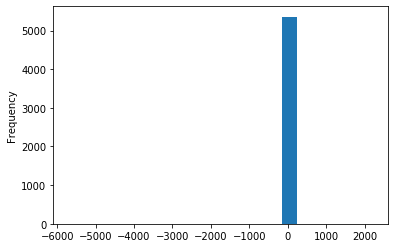

In [17]:
ax1 = data_set['IQ_EBIT_PERC_growth'].plot.hist(bins= 20)

,index,year,IQ_EBIT-4,IQ_TOTAL_OTHER_OPER-4,IQ_EARNING_CO-4,IQ_TOTAL_REV-4,IQ_GP-4,IQ_OTHER_OPER-4,IQ_INC_TAX-4,IQ_NET_INTEREST_EXP-4,...,IQ_TOTAL_ASSETS+0,IQ_TOTAL_CL+0,IQ_TOTAL_EQUITY+0,IQ_TOTAL_LIAB_EQUITY+0,IQ_AR+1,IQ_RE+1,IQ_TOTAL_ASSETS+1,IQ_TOTAL_CL+1,IQ_TOTAL_EQUITY+1,IQ_TOTAL_LIAB_EQUITY+1
count,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000
mean,2169.279095,2015.223938,0.026634,0.778749,-0.072347,2.136957,0.805383,0.118734,0.028838,-0.019569,...,11.502597,3.909508,5.687532,11.502597,2.669050,-2.390931,11.969411,4.050744,5.870589,11.969411
std,1465.952333,1.883043,0.544176,1.874351,1.007324,2.931685,1.888220,0.702636,0.188525,0.066071,...,13.672269,5.470625,8.925525,13.672269,3.506909,11.339508,14.743009,5.624916,9.613055,14.743009
min,6.000000,2012.000000,-3.958475,-4.335891,-18.492723,-11.126720,-4.420249,-8.075947,-0.942607,-1.004320,...,0.158315,0.011949,-48.828995,0.158315,0.000001,-137.853320,0.140966,0.007514,-48.828995,0.140966
25%,914.000000,2014.000000,-0.125460,0.201896,-0.156374,0.781406,0.188343,-0.021574,-0.006176,-0.031136,...,4.343332,1.150298,1.516693,4.343332,0.821718,-2.804615,4.477981,1.171704,1.514393,4.477979
50%,1989.000000,2015.000000,0.049220,0.452368,0.026861,1.666028,0.482421,0.004354,0.007299,-0.004125,...,8.462238,2.918081,3.954418,8.462239,1.955198,0.046194,8.711299,2.999237,4.010018,8.711299
75%,3099.000000,2017.000000,0.240474,0.930618,0.186698,2.795273,1.018087,0.109309,0.046108,0.001975,...,14.937622,4.915000,7.990860,14.937622,3.463195,1.763481,15.127272,5.169194,8.213084,15.127272
max,5367.000000,2018.000000,3.017042,60.148327,22.636517,53.906240,59.899020,13.973235,3.462811,0.374468,...,210.870930,98.170020,133.600510,210.870930,65.048700,29.014720,210.870930,99.023100,133.600510,210.870930


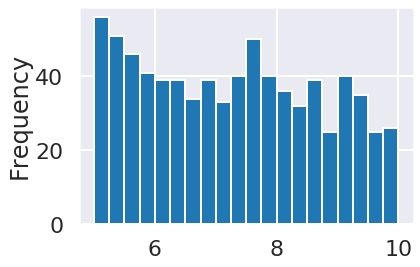

In [283]:
#filter tails of the data set and rerun the models
data_set2=data_set[(data_set['IQ_TOTAL_REV+0']<5) ]
data_set3=data_set[(data_set['IQ_TOTAL_REV+0']>=5) & (data_set['IQ_TOTAL_REV+0']<10) ]
data_set4=data_set[(data_set['IQ_TOTAL_REV+0']<100) & (data_set['IQ_TOTAL_REV+0']>=10) ]
data_set5=data_set[(data_set['IQ_TOTAL_REV+0']>=100) ]



ax1 = data_set3['IQ_TOTAL_REV+0'].plot.hist(bins= 20)
data_set2.describe()
#first set looking into IQ_EBIT_PERC_growth which is the target
#loose 130 values or so if filter by 10 -> mae to 4 
#loose 1600 values if filter by one -> mae to 3.4
#loose 2000 values filter _+0.5 -> mae increases to 4 again
#now focusing on total rev
#positive revenue and smaller than 100; removed 600 samples and the mae-> 2.7
#positive revenue and smaller than 10; removed 1600 samples and the mae-> 1.7

In [194]:
#removed all values from 2018 and left EBIT 2018 as a target

predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set[predictors]), np.array(data_set[target]), test_size=0.33, random_state=42)

In [230]:
#train and test from first set of data
predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set2[predictors]), np.array(data_set2[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf1.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf1.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf2.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


#fi = rf_feat_importance(rf, X_train)
rf.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',

#train and test from first set of data
predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set3[predictors]), np.array(data_set3[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf2.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf2.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf2.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


#train and test from first set of data
predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set4[predictors]), np.array(data_set4[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf3.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf3.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf3.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


print(X_train)
data_set3.head()

#train and test from first set of data
predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set5[predictors]), np.array(data_set5[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf4 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf4.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf4.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf4.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

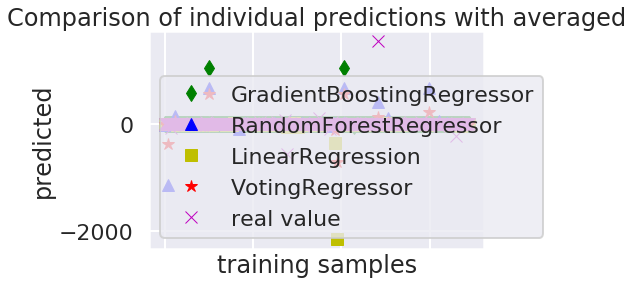

In [229]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
ereg.fit(X_train, y_train)


plt.figure()
plt.plot(reg1.predict(X_test), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(X_test), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(X_test), 'ys', label='LinearRegression')
plt.plot(ereg.predict(X_test), 'r*', label='VotingRegressor')
plt.plot(y_test,'mx', label="real value")
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()


In [207]:
new_formatset=pd.read_csv('/home/reference/pivate_public_file.csv')
new_formatset.head()

,Unnamed: 0,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0
1,1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0
2,2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0
3,3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0
4,4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0


In [32]:

new_formatset.columns

Index(['Unnamed: 0', 'company', 'year', 'quarter', 'IQ_EBIT',
       'IQ_TOTAL_OTHER_OPER', 'IQ_OPER_INC', 'IQ_TOTAL_REV', 'TARGET', 'IQ_AR',
       'IQ_RE', 'IQ_TOTAL_ASSETS', 'IQ_PRIV', 'IQ_PUB'],
      dtype='object')

In [33]:
#removed all values from 2018 and left EBIT 2018 as a target




predictors = [ 'IQ_EBIT',
       'IQ_TOTAL_OTHER_OPER', 'IQ_OPER_INC', 'IQ_TOTAL_REV', 'IQ_AR',
       'IQ_RE', 'IQ_TOTAL_ASSETS', 'IQ_PRIV', 'IQ_PUB']
target     =  'TARGET'

X_train, X_test, y_train, y_test = train_test_split(np.array(new_formatset[predictors]), np.array(new_formatset[target]), test_size=0.33, random_state=42)

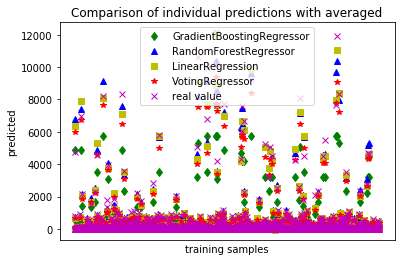

In [34]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
ereg.fit(X_train, y_train)


plt.figure()
plt.plot(reg1.predict(X_test), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(X_test), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(X_test), 'ys', label='LinearRegression')
plt.plot(ereg.predict(X_test), 'r*', label='VotingRegressor')
plt.plot(y_test,'mx', label="real value")
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()


In [35]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [36]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


predictions_df=pd.DataFrame(predictions)
y_test_df=pd.DataFrame(y_test)

predictions_df.to_csv( 'predictions_RF_NNdataframe.csv')
y_test_df.to_csv('target_RF_NNdataframe.csv')


Mean Absolute Error: 18.81 degrees.


In [37]:
rf.feature_importances_
#the most important feature is revenue
# 'IQ_EBIT', 'IQ_TOTAL_OTHER_OPER', 'IQ_OPER_INC', 'IQ_TOTAL_REV', 'IQ_AR','IQ_RE', 'IQ_TOTAL_ASSETS', 'IQ_PRIV', 'IQ_PUB'

array([7.09912526e-03, 1.10456301e-02, 6.84804920e-03, 9.23040604e-01,
       3.40433665e-02, 1.47176501e-03, 1.47367654e-02, 1.64745470e-03,
       6.72401024e-05])

In [38]:
#scaler = preprocessing.StandardScaler().fit(X_train)
#scaler.mean_                                      
#scaler.scale_                                       
#X_train_scaled=scaler.transform(X_train)  
#X_test_scaled=scaler.transform(X_test)  

In [39]:
# Training classifiers
#reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
#reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
#reg3 = LinearRegression()
#ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
#reg1.fit(X_train_scaled, y_train)
#reg2.fit(X_train_scaled, y_train)
#reg3.fit(X_train_scaled, y_train)
#ereg.fit(X_train_scaled, y_train)


#plt.figure()
#plt.plot(reg1.predict(X_test_scaled), 'gd', label='GradientBoostingRegressor')
#plt.plot(reg2.predict(X_test_scaled), 'b^', label='RandomForestRegressor')
#plt.plot(reg3.predict(X_test_scaled), 'ys', label='LinearRegression')
#plt.plot(ereg.predict(X_test_scaled), 'r*', label='VotingRegressor')
#plt.plot(y_test,'mx', label="real value")
#plt.tick_params(axis='x', which='both', bottom=False, top=False,
 #               labelbottom=False)
#plt.ylabel('predicted')
#plt.xlabel('training samples')
#plt.legend(loc="best")
#plt.title('Comparison of individual predictions with averaged')
#plt.show()

In [40]:
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators=100,random_state = 0)
# Train the model on training data
#rf.fit(X_train_scaled, y_train)

In [41]:
# Use the forest's predict method on the test data
#predictions = rf.predict(X_test)
# Calculate the absolute errors
#errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


In [13]:
#create the data on new format
source = prv_input_IS

features = ['IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_EARNING_CO','IQ_TOTAL_REV','IQ_GP','IQ_OTHER_OPER','IQ_INC_TAX','IQ_NET_INTEREST_EXP']

IS_train, IS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 1,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)

# Read from Balance Sheets
features =  ['IQ_AR','IQ_RE','IQ_TOTAL_ASSETS','IQ_TOTAL_CL','IQ_TOTAL_EQUITY','IQ_TOTAL_LIAB_EQUITY']
source = prv_input_BS
BS_train, BS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 1,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)


# Merge dataframes

train_df = IS_train.set_index(['company','year','quarter']).join(BS_train.set_index(['company','year','quarter']))
test_df  = IS_test.set_index(['company','year','quarter']).join(BS_test.set_index(['company','year','quarter']))

train_df = train_df.reset_index().dropna()
test_df  = test_df.reset_index().dropna()
data_private = pd.concat([train_df,test_df]).reset_index().dropna()


NameError: name 'extract_time_series' is not defined

In [269]:
#create the data on new format
source = pub_input_IS

features = ['IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_EARNING_CO','IQ_TOTAL_REV','IQ_GP','IQ_OTHER_OPER','IQ_INC_TAX','IQ_NET_INTEREST_EXP']

IS_train, IS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 4,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)

# Read from Balance Sheets
features =  ['IQ_AR','IQ_RE','IQ_TOTAL_ASSETS','IQ_TOTAL_CL','IQ_TOTAL_EQUITY','IQ_TOTAL_LIAB_EQUITY']
source = pub_input_BS
BS_train, BS_test = extract_time_series(input_path = source,\
                                          features = features,
                                             steps = 4,\
                                          year_min = 2012,\
                                              norm = False,\
                                          no_shift = False,\
                                           quarterly=True)


# Merge dataframes

train_df = IS_train.set_index(['company','year','quarter']).join(BS_train.set_index(['company','year','quarter']))
test_df  = IS_test.set_index(['company','year','quarter']).join(BS_test.set_index(['company','year','quarter']))

train_df = train_df.reset_index().dropna()
test_df  = test_df.reset_index().dropna()
data_set = pd.concat([train_df,test_df]).reset_index().dropna()
data_set.head()

====  extract_time_series metric ====
Size of data read from the file: (16403, 11)
Size of RESHAPED data without NA: (7513, 51)
No of companies in RESHAPED data: 334
No of companies with more than 1 datapoint 309
TEST  set size: (309, 51)
TRAIN set size: (5370, 51)
TEST is 5% of all available datapoints
====  extract_time_series metric ====
Size of data read from the file: (16029, 9)
Size of RESHAPED data without NA: (11171, 39)
No of companies in RESHAPED data: 446
No of companies with more than 1 datapoint 430
TEST  set size: (430, 39)
TRAIN set size: (7902, 39)
TEST is 5% of all available datapoints


,index,company,year,quarter,IQ_EBIT-4,IQ_TOTAL_OTHER_OPER-4,IQ_EARNING_CO-4,IQ_TOTAL_REV-4,IQ_GP-4,IQ_OTHER_OPER-4,...,IQ_TOTAL_ASSETS+0,IQ_TOTAL_CL+0,IQ_TOTAL_EQUITY+0,IQ_TOTAL_LIAB_EQUITY+0,IQ_AR+1,IQ_RE+1,IQ_TOTAL_ASSETS+1,IQ_TOTAL_CL+1,IQ_TOTAL_EQUITY+1,IQ_TOTAL_LIAB_EQUITY+1
0,0,IQ1004737,2012.0,Q1,1.741296,0.519460,0.451737,18.149479,2.260757,-0.580632,...,168.26607,89.302216,55.802704,168.26607,69.271740,8.383482,162.61584,88.058365,53.207203,162.61584
1,1,IQ1004737,2012.0,Q2,2.169101,0.897586,0.688995,23.868147,3.066687,-0.562990,...,162.61584,88.058365,53.207203,162.61584,69.767490,8.587215,158.08240,85.536446,52.619545,158.08240
2,2,IQ1004737,2012.0,Q3,1.228158,1.393162,-0.520597,22.193170,2.621320,0.019547,...,158.08240,85.536446,52.619545,158.08240,63.937496,10.904575,151.79121,76.780320,55.713505,151.79121
3,3,IQ1004737,2012.0,Q4,4.357645,3.713942,2.118456,30.077684,8.071587,0.033199,...,151.79121,76.780320,55.713505,151.79121,63.490673,11.876999,160.37314,82.988920,58.466267,160.37314
4,4,IQ1004737,2013.0,Q1,-0.239797,2.170620,-1.337370,26.508942,1.930823,0.170620,...,160.37314,82.988920,58.466267,160.37314,62.997720,8.442230,158.79214,82.307930,58.947666,158.79214


In [282]:
data_agg=data_set.groupby(['year', 'company']).sum()
print(data_agg.columns)
data_private.head()
data_agg['IQ_TOTAL_REV+0'].describe()

Index(['index', 'IQ_EBIT-4', 'IQ_TOTAL_OTHER_OPER-4', 'IQ_EARNING_CO-4',
       'IQ_TOTAL_REV-4', 'IQ_GP-4', 'IQ_OTHER_OPER-4', 'IQ_INC_TAX-4',
       'IQ_NET_INTEREST_EXP-4', 'IQ_EBIT-3', 'IQ_TOTAL_OTHER_OPER-3',
       'IQ_EARNING_CO-3', 'IQ_TOTAL_REV-3', 'IQ_GP-3', 'IQ_OTHER_OPER-3',
       'IQ_INC_TAX-3', 'IQ_NET_INTEREST_EXP-3', 'IQ_EBIT-2',
       'IQ_TOTAL_OTHER_OPER-2', 'IQ_EARNING_CO-2', 'IQ_TOTAL_REV-2', 'IQ_GP-2',
       'IQ_OTHER_OPER-2', 'IQ_INC_TAX-2', 'IQ_NET_INTEREST_EXP-2', 'IQ_EBIT-1',
       'IQ_TOTAL_OTHER_OPER-1', 'IQ_EARNING_CO-1', 'IQ_TOTAL_REV-1', 'IQ_GP-1',
       'IQ_OTHER_OPER-1', 'IQ_INC_TAX-1', 'IQ_NET_INTEREST_EXP-1', 'IQ_EBIT+0',
       'IQ_TOTAL_OTHER_OPER+0', 'IQ_EARNING_CO+0', 'IQ_TOTAL_REV+0', 'IQ_GP+0',
       'IQ_OTHER_OPER+0', 'IQ_INC_TAX+0', 'IQ_NET_INTEREST_EXP+0', 'IQ_EBIT+1',
       'IQ_TOTAL_OTHER_OPER+1', 'IQ_EARNING_CO+1', 'IQ_TOTAL_REV+1', 'IQ_GP+1',
       'IQ_OTHER_OPER+1', 'IQ_INC_TAX+1', 'IQ_NET_INTEREST_EXP+1', 'IQ_AR-4',
       'IQ_RE

count     1521.000000
mean       358.940386
std       1776.789784
min         -0.064826
25%          7.657359
50%         28.215641
75%         96.492539
max      24786.370900
Name: IQ_TOTAL_REV+0, dtype: float64

In [272]:
data_private['IQ_EBIT_AGG_perc']=(data_private['IQ_EBIT+0']-data_private['IQ_EBIT-1'])/data_private['IQ_EBIT-1']
data_private['IQ_TOTAL_ASSETS_AGG_perc']=(data_private['IQ_TOTAL_ASSETS+0']-data_private['IQ_TOTAL_ASSETS-1'])/data_private['IQ_TOTAL_ASSETS-1']
data_private['IQ_TOTAL_OTHER_OPER_AGG_perc']=(data_private['IQ_TOTAL_OTHER_OPER+0']-data_private['IQ_TOTAL_OTHER_OPER-1'])/data_private['IQ_TOTAL_OTHER_OPER-1']
data_private['IQ_TOTAL_REV_AGG_perc']=(data_private['IQ_TOTAL_REV+0']-data_private['IQ_TOTAL_REV-1'])/data_private['IQ_TOTAL_REV-1']
data_private['IQ_RE_AGG_perc']=(data_private['IQ_RE+0']-data_private['IQ_RE-1'])/data_private['IQ_RE-1']


In [286]:
data_agg['IQ_EBIT_AGG_perc']=(data_agg['IQ_EBIT+0']-data_agg['IQ_EBIT-4'])/data_agg['IQ_EBIT-4']
data_agg['IQ_EBIT_AGG_growth_perc']=(data_agg['IQ_EBIT+1']-data_agg['IQ_EBIT+0'])/data_agg['IQ_EBIT+0']

data_agg['IQ_TOTAL_ASSETS_AGG_perc']=(data_agg['IQ_TOTAL_ASSETS+0']-data_agg['IQ_TOTAL_ASSETS-4'])/data_agg['IQ_TOTAL_ASSETS-4']
data_agg['IQ_TOTAL_OTHER_OPER_AGG_perc']=(data_agg['IQ_TOTAL_OTHER_OPER+0']-data_agg['IQ_TOTAL_OTHER_OPER-4'])/data_agg['IQ_TOTAL_OTHER_OPER-4']
data_agg['IQ_TOTAL_REV_AGG_perc']=(data_agg['IQ_TOTAL_REV+0']-data_agg['IQ_TOTAL_REV-4'])/data_agg['IQ_TOTAL_REV-4']
data_agg['IQ_RE_AGG_perc']=(data_agg['IQ_RE+0']-data_agg['IQ_RE-4'])/data_agg['IQ_RE-4']
data_agg['IQ_GP_AGG_perc']=(data_agg['IQ_GP+0']-data_agg['IQ_GP-4'])/data_agg['IQ_GP-4']
data_agg['IQ_AR_AGG_perc']=(data_agg['IQ_AR+0']-data_agg['IQ_AR-4'])/data_agg['IQ_AR-4']

data_agg=data_agg.replace(np.nan, 0)
data_agg=data_agg.replace(np.inf, 0)
data_agg.describe()
predictors = ['IQ_TOTAL_OTHER_OPER_AGG_perc','IQ_TOTAL_REV_AGG_perc','IQ_GP_AGG_perc',
             'IQ_AR_AGG_perc','IQ_RE_AGG_perc','IQ_TOTAL_ASSETS_AGG_perc', 'IQ_EBIT_AGG_perc','IQ_EBIT+0']
target     =  'IQ_EBIT_AGG_growth_perc'



In [287]:
#filter tails of the data set and rerun the models
data_set2=data_agg[(data_agg['IQ_TOTAL_REV+0']<5) ]
data_set3=data_agg[(data_agg['IQ_TOTAL_REV+0']>=5) & (data_agg['IQ_TOTAL_REV+0']<10) ]
data_set4=data_agg[(data_agg['IQ_TOTAL_REV+0']<100) & (data_agg['IQ_TOTAL_REV+0']>=10) ]
data_set5=data_agg[(data_agg['IQ_TOTAL_REV+0']>=100) ]




data_set2.describe()
#first set looking into IQ_EBIT_PERC_growth which is the target
#loose 130 values or so if filter by 10 -> mae to 4 
#loose 1600 values if filter by one -> mae to 3.4
#loose 2000 values filter _+0.5 -> mae increases to 4 again
#now focusing on total rev
#positive revenue and smaller than 100; removed 600 samples and the mae-> 2.7
#positive revenue and smaller than 10; removed 1600 samples and the mae-> 1.7

,index,IQ_EBIT-4,IQ_TOTAL_OTHER_OPER-4,IQ_EARNING_CO-4,IQ_TOTAL_REV-4,IQ_GP-4,IQ_OTHER_OPER-4,IQ_INC_TAX-4,IQ_NET_INTEREST_EXP-4,IQ_EBIT-3,...,IQ_TOTAL_EQUITY+1,IQ_TOTAL_LIAB_EQUITY+1,IQ_EBIT_AGG_perc,IQ_EBIT_AGG_growth_perc,IQ_TOTAL_ASSETS_AGG_perc,IQ_TOTAL_OTHER_OPER_AGG_perc,IQ_TOTAL_REV_AGG_perc,IQ_RE_AGG_perc,IQ_GP_AGG_perc,IQ_AR_AGG_perc
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,4313.869258,-0.190447,1.472002,-0.433022,2.773725,1.281555,0.272097,0.036702,-0.044522,-0.210285,...,6.719084,14.684521,2.656698,-0.227282,0.346527,0.341789,-72.601066,3.907338,-3.169846,2.830672
std,3544.808310,1.005631,4.230645,2.398594,6.937149,4.141360,1.384817,0.335581,0.134825,0.994695,...,20.925656,24.650969,40.766460,4.594035,1.466929,2.454344,1230.763550,41.054426,44.097795,23.582840
min,6.000000,-5.749394,-1.941638,-18.492723,-4.476570,-1.793826,-1.198003,-0.942607,-1.133238,-6.384927,...,-96.449688,0.140966,-35.466775,-34.886792,-0.983973,-16.179803,-20704.000000,-10.000473,-726.280579,-0.999995
25%,1562.000000,-0.367580,0.302279,-0.403556,0.727006,0.206326,-0.027897,-0.006097,-0.051231,-0.308531,...,1.018225,3.522439,-1.043828,-0.556594,-0.121489,-0.235283,-0.213481,-0.456069,-0.509504,-0.229143
50%,3280.000000,0.022326,0.707520,0.005497,1.756808,0.674151,0.013259,0.008704,-0.004480,0.005727,...,3.807478,8.847734,-0.334751,-0.068871,0.042970,0.038057,0.042075,0.070588,-0.011768,-0.008438
75%,6489.000000,0.206137,1.348754,0.134711,3.416796,1.313380,0.099140,0.049544,0.001800,0.161786,...,10.331415,19.352314,0.592006,0.287000,0.306414,0.445030,0.285938,0.743086,0.390212,0.398377
max,15998.000000,2.804938,63.005542,23.618275,101.362779,61.966272,13.973235,3.414450,0.481788,3.428226,...,271.105569,366.077428,671.641773,36.502205,16.618530,19.562768,43.330561,526.200497,41.792652,305.698032


In [288]:
#train and test from first set of data


X_train, X_test, y_train, y_test = train_test_split(np.array(data_set2[predictors]), np.array(data_set2[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf1.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf1.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf2.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


#fi = rf_feat_importance(rf, X_train)
rf.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',

#train and test from first set of data


X_train, X_test, y_train, y_test = train_test_split(np.array(data_set3[predictors]), np.array(data_set3[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf2.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf2.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf2.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


#train and test from first set of data


X_train, X_test, y_train, y_test = train_test_split(np.array(data_set4[predictors]), np.array(data_set4[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf3.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf3.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf3.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


print(X_train)
data_set3.head()

#train and test from first set of data

X_train, X_test, y_train, y_test = train_test_split(np.array(data_set5[predictors]), np.array(data_set5[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf4 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf4.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf4.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf4.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


Mean Absolute Error: 1.97 degrees.
0    0.606264
dtype: float64 mean absolute error
Accuracy: -341.65 %.
Accuracy: -341.65 %.
Mean Absolute Error: 4.4 degrees.
0    5.065481
dtype: float64 mean absolute error
Accuracy: -2154.72 %.
Mean Absolute Error: 3.9 degrees.
0    1.695496
dtype: float64 mean absolute error
Accuracy: -inf %.
[[-5.09772462e-02 -1.22119563e-01 -2.21462308e-01 ... -1.01688373e-01
   4.18829220e-02 -7.44197302e-01]
 [ 5.16588462e-02  1.27682768e-01  5.66344045e-02 ... -2.00904752e+00
   8.51632315e-02  7.60510402e-02]
 [-3.60051250e-02  1.04269706e-01  1.66393519e-01 ...  5.75100403e+00
  -8.56229385e-02 -5.80745163e+00]
 ...
 [-2.41666584e-01 -1.32888475e-01 -2.19642284e-02 ...  9.77541640e-02
  -2.67031859e-01 -7.60430947e-01]
 [ 2.70851036e-01  3.27599133e-01  3.70596283e-01 ... -2.22444778e+00
   2.23881472e-01 -8.35815517e-01]
 [ 4.63939206e-02  3.31274666e-02  7.15214286e-02 ...  6.18175740e-02
  -3.47295042e-03  6.04364556e-01]]
Mean Absolute Error: 0.4 degrees

/home/paloma_heras_ambros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:132: RuntimeWarning: divide by zero encountered in true_divide


array([0.08780683, 0.01556384, 0.11388023, 0.04647351, 0.14546258,
       0.02068823, 0.57012477])

In [289]:
#train and test from first set of data
#predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
#             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
#target     =  'IQ_EBIT_PERC_growth'

X_train, X_test, y_train, y_test = train_test_split(np.array(data_agg1[predictors]), np.array(data_agg1[target]), test_size=0.33, random_state=42)

X_previous=X_test[:,7]
X_train=np.delete(X_train, -1, axis=1)
X_test=np.delete(X_test, -1,axis=1)
X_train.shape
X_previous
X_previous=pd.DataFrame(X_previous)

  
# Instantiate model with 1000 decision trees
rf4 = RandomForestRegressor(n_estimators=10,random_state = 0)
# Train the model on training data
rf4.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf4.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y_test+1))*X_previous

predicted_real=(pd.DataFrame(predictions)+1)*(X_previous)
errors_real_val=abs(predicted_real-real_val)
print(np.mean(errors_real_val), 'mean absolute error')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * abs((predictions-y_test)/ y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#fi = rf_feat_importance(rf, X_train)
rf4.feature_importances_

#['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
 #            'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC',


Mean Absolute Error: 1.97 degrees.
0    0.606264
dtype: float64 mean absolute error
Accuracy: -341.65 %.


array([0.28814462, 0.06178904, 0.15537161, 0.13590201, 0.08680242,
       0.0381469 , 0.23384341])

In [290]:
data_agg2=data_agg.loc[:, ['IQ_EBIT_AGG_perc','IQ_TOTAL_ASSETS_AGG_perc','IQ_TOTAL_OTHER_OPER_AGG_perc','IQ_TOTAL_REV_AGG_perc','IQ_RE_AGG_perc']]

data_private2=data_private.loc[:, ['IQ_EBIT_AGG_perc','IQ_TOTAL_ASSETS_AGG_perc','IQ_TOTAL_OTHER_OPER_AGG_perc','IQ_TOTAL_REV_AGG_perc','IQ_RE_AGG_perc']]

data_private2=data_private2.replace(np.nan, 0)

data_private2=data_private2.replace(np.inf, 0)
data_private2.head()

data_agg2=data_agg2.replace(np.nan, 0)

data_agg2=data_agg2.replace(np.inf, 0)
data_agg2.head()

IQ_EBIT_AGG_perc  IQ_TOTAL_ASSETS_AGG_perc  \
year   company                                                  
2012.0 IQ1004737          -0.306820                  0.001284   
       IQ10214670          0.165755                 -0.097723   
       IQ1034090           0.112381                 -0.076519   
       IQ10361568         -0.116195                 -0.213391   
       IQ1047789           1.678275                 -0.029631   

                   IQ_TOTAL_OTHER_OPER_AGG_perc  IQ_TOTAL_REV_AGG_perc  \
year   company                                                           
2012.0 IQ1004737                       0.615763               0.200799   
       IQ10214670                     -0.000472               0.049689   
       IQ1034090                      -0.139448              -0.067495   
       IQ10361568                      0.035534               0.100521   
       IQ1047789                       6.788316               0.306172   

                   IQ_RE_AGG_perc  
year   company                     
2012.0 IQ1004737        -0.298288  
       IQ10214670        0.249949  
       IQ1034090        -0.078741  
       IQ10361568        0.082457  
       IQ1047789        -0.075834

Text(0.5, 1.0, 'Silhouetter Score Curve')

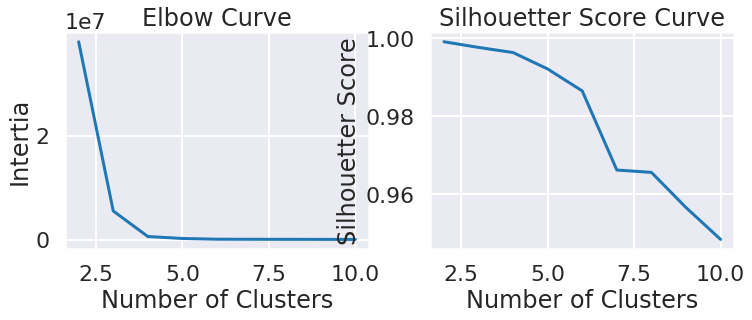

In [86]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = data_agg2.loc[:,'IQ_EBIT_AGG_perc':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [98]:
# We retain 4 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=4, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-1.76693351e-01,  4.26946059e-02,  7.30695458e-02,
         3.93025465e-02, -6.98153294e-02],
       [ 4.98279189e+04,  1.46571313e-01,  6.28705729e-02,
         2.21420865e-02, -2.27933095e-02],
       [-5.70430435e+03, -3.42475318e-01,  1.73814854e-01,
         1.43072907e+00, -1.69648649e+01],
       [ 2.21747826e+03,  5.07796665e-01,  6.03611273e-01,
         2.36811703e-01,  5.05970273e-02]])

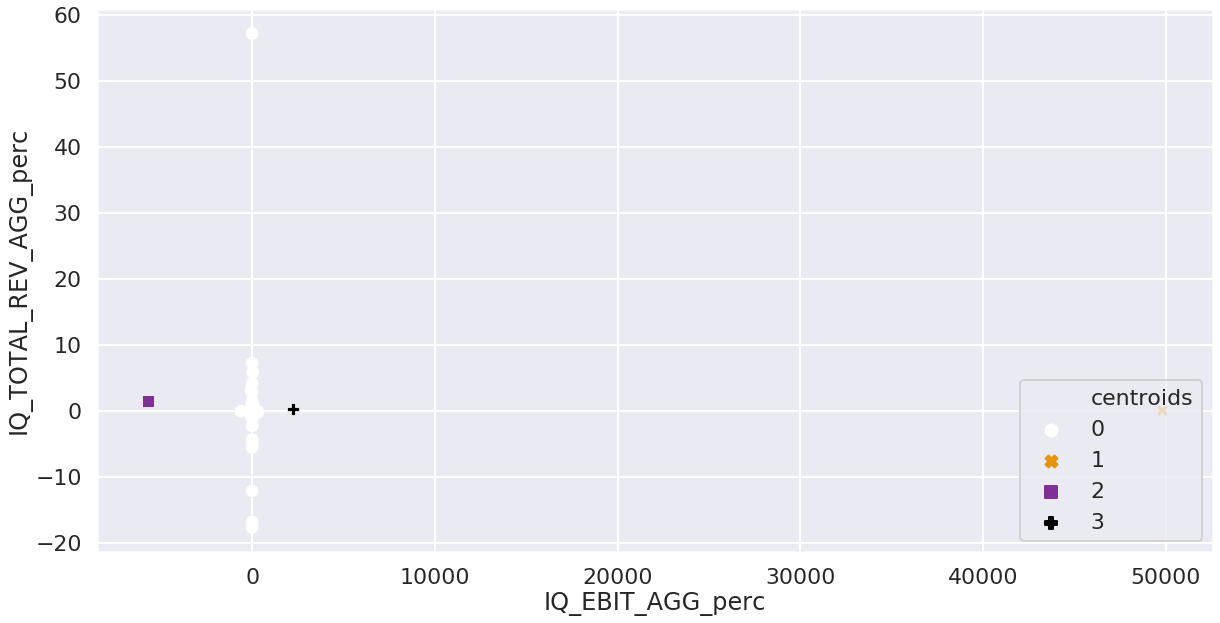

In [99]:
import seaborn as sns
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
data_agg2 = data_agg2.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
#scaled_features.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_EBIT_AGG_perc", y="IQ_TOTAL_REV_AGG_perc", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = data_agg2)


plt.legend(loc='lower right')
 
#sns.plt.show()

In [100]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 1694
1 1
2 1
3 1


In [107]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree

Y=data_private2.loc[:,'IQ_EBIT_AGG_perc':]

##balltree algorithm to fit
#create data frame for private companies in the same format
#call the kNN and fin the closest companies/company -> return company group -> run the algorithm 
tree = BallTree(X, leaf_size=2)              



In [122]:
dist, ind = tree.query(Y, k=1)                

#save ind for the min dist 
#print(dist)  # distances to 3 closest neighbors
#print(ind)

Y['index']=ind


[[3.86331945e-01]
 [3.40334805e-01]
 [6.04832429e-01]
 [6.98737202e-01]
 [4.30326036e-01]
 [5.75713200e-01]
 [1.25996091e-01]
 [2.22654171e-01]
 [2.39819658e-01]
 [1.34792306e-01]
 [2.34047929e-01]
 [5.27535084e-01]
 [1.58688657e-01]
 [1.27882011e-01]
 [1.10779225e-01]
 [1.01971994e+01]
 [7.71928238e-01]
 [1.66090322e-01]
 [4.33763286e-01]
 [4.23944273e-01]
 [9.12380166e-01]
 [8.82196192e-02]
 [3.97915170e+00]
 [5.21776799e+00]
 [1.00150010e+01]
 [8.62245705e-02]
 [2.51904053e-01]
 [2.25048624e-01]
 [2.37931317e-01]
 [3.16503877e-01]
 [4.21400759e-01]
 [5.36404111e+00]
 [5.78404685e-01]
 [6.25478771e-01]
 [3.82293403e-01]
 [7.65887193e-01]
 [2.18629988e+00]
 [3.28304280e-01]
 [7.56827809e-01]
 [1.01013629e+00]
 [5.31883980e-01]
 [5.82231468e-01]
 [1.54029952e-01]
 [7.36863299e-02]
 [1.30834597e-01]
 [3.93409712e-01]
 [1.68351366e-01]
 [1.26280421e-01]
 [1.12471172e+00]
 [1.00964273e+00]
 [2.85369053e+02]
 [3.29656800e-01]
 [1.45982938e+00]
 [1.32649389e-01]
 [1.27795647e-01]
 [3.815530

/home/paloma_heras_ambros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [211]:
data_private['REV_group']=0
for i in range(0, len(Y)):
    index_number=int(Y.loc[i, 'index'])
    new=data_agg.iloc[[index_number]]
    revenue=float(new.loc[:, 'IQ_TOTAL_REV+0'])
    if revenue<5:
        data_private.REV_group[[i]]=1
    if (revenue<10) & (revenue >=5):
        data_private.REV_group[[i]]=2
    if (revenue<100) & (revenue>=10):
        data_private.REV_group[[i]]=3
    if revenue>=100:
        data_private.REV_group[[i]]=4
Y.head()       

/home/paloma_heras_ambros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/paloma_heras_ambros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/paloma_heras_ambros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,IQ_EBIT_AGG_perc,IQ_TOTAL_ASSETS_AGG_perc,IQ_TOTAL_OTHER_OPER_AGG_perc,IQ_TOTAL_REV_AGG_perc,IQ_RE_AGG_perc,index,REV_group,"(0, REV_group)"
0,0.813676,0.410850,0.409243,0.453347,-1.367120,1026,1,1
1,-0.884710,0.420775,0.453255,0.518506,0.332161,284,1,1
2,-0.222683,0.400743,0.199457,0.213777,3.973273,327,4,1
3,2.371602,0.430050,0.878308,1.169641,-0.035713,1464,1,1
4,1.038008,0.574117,0.257817,0.334466,0.623553,1571,1,1


In [212]:
data_private.groupby('REV_group').describe()

index                                                              \
           count        mean         std   min     25%    50%     75%    max   
REV_group                                                                      
1          146.0  283.917808  193.368204   1.0  112.25  259.0  451.00  638.0   
2           49.0  278.040816  181.626558  26.0  131.00  226.0  447.00  622.0   
3          140.0  284.928571  189.903824   9.0  124.75  250.5  457.25  615.0   
4           43.0  315.906977  197.421089  18.0  156.50  269.0  528.50  621.0   

            year               ... IQ_TOTAL_REV_AGG_perc             \
           count         mean  ...                   75%        max   
REV_group                      ...                                    
1          146.0  2015.000000  ...              0.442476  21.250159   
2           49.0  2014.714286  ...              0.166547   1.314029   
3          140.0  2014.628571  ...              0.265889   2.245610   
4           43.0  2014.534884  ...              0.167223   0.548540   

          IQ_RE_AGG_perc                                               \
                   count       mean         std         min       25%   
REV_group                                                               
1                  146.0  30.325603  320.609637 -359.051095 -0.209168   
2                   49.0  -0.284981    1.141796   -5.494094 -0.814029   
3                  140.0  -0.006337    3.187605  -20.057326 -0.232725   
4                   43.0   0.483194    1.748103   -3.279624 -0.386131   

                                            
                50%       75%          max  
REV_group                                   
1          0.182433  1.012122  3840.142857  
2          0.003236  0.264022     2.448822  
3          0.081578  0.416349    10.821737  
4          0.059399  1.049657     4.251992  

[4 rows x 392 columns]

In [218]:
data_private.columns


Index(['index', 'company', 'year', 'quarter', 'IQ_EBIT-1',
       'IQ_TOTAL_OTHER_OPER-1', 'IQ_EARNING_CO-1', 'IQ_TOTAL_REV-1', 'IQ_GP-1',
       'IQ_OTHER_OPER-1', 'IQ_INC_TAX-1', 'IQ_NET_INTEREST_EXP-1', 'IQ_EBIT+0',
       'IQ_TOTAL_OTHER_OPER+0', 'IQ_EARNING_CO+0', 'IQ_TOTAL_REV+0', 'IQ_GP+0',
       'IQ_OTHER_OPER+0', 'IQ_INC_TAX+0', 'IQ_NET_INTEREST_EXP+0', 'IQ_EBIT+1',
       'IQ_TOTAL_OTHER_OPER+1', 'IQ_EARNING_CO+1', 'IQ_TOTAL_REV+1', 'IQ_GP+1',
       'IQ_OTHER_OPER+1', 'IQ_INC_TAX+1', 'IQ_NET_INTEREST_EXP+1', 'IQ_AR-1',
       'IQ_RE-1', 'IQ_TOTAL_ASSETS-1', 'IQ_TOTAL_CL-1', 'IQ_TOTAL_EQUITY-1',
       'IQ_TOTAL_LIAB_EQUITY-1', 'IQ_AR+0', 'IQ_RE+0', 'IQ_TOTAL_ASSETS+0',
       'IQ_TOTAL_CL+0', 'IQ_TOTAL_EQUITY+0', 'IQ_TOTAL_LIAB_EQUITY+0',
       'IQ_AR+1', 'IQ_RE+1', 'IQ_TOTAL_ASSETS+1', 'IQ_TOTAL_CL+1',
       'IQ_TOTAL_EQUITY+1', 'IQ_TOTAL_LIAB_EQUITY+1', 'IQ_EBIT_AGG_perc',
       'IQ_TOTAL_ASSETS_AGG_perc', 'IQ_TOTAL_OTHER_OPER_AGG_perc',
       'IQ_TOTAL_REV_AGG_perc',

In [216]:
data_private['IQ_EBIT_PERC_growth']=(data_private['IQ_EBIT+1']-data_private['IQ_EBIT+0'])/data_private['IQ_EBIT+0']
data_private['IQ_EBIT_PERC']=(data_private['IQ_EBIT+0']-data_private['IQ_EBIT-1'])/data_private['IQ_EBIT-1']
data_private['IQ_TOTAL_OTHER_OPER_PERC']=(data_private['IQ_TOTAL_OTHER_OPER+0']-data_private['IQ_TOTAL_OTHER_OPER-1'])/data_private['IQ_TOTAL_OTHER_OPER-1']
data_private['IQ_TOTAL_REV_PERC']=(data_private['IQ_TOTAL_REV+0']-data_private['IQ_TOTAL_REV-1'])/data_private['IQ_TOTAL_REV-1']
data_private['IQ_EARNING_CO_PERC']=(data_private['IQ_EARNING_CO+0']-data_private['IQ_EARNING_CO-1'])/data_private['IQ_EARNING_CO-1']
data_private['IQ_GP_PERC']=(data_private['IQ_GP+0']-data_private['IQ_GP-1'])/data_private['IQ_GP-1']
data_private['IQ_OTHER_OPER_PERC']=(data_private['IQ_OTHER_OPER+0']-data_private['IQ_OTHER_OPER-1'])/data_private['IQ_OTHER_OPER-1']
data_private['IQ_AR_PERC']=(data_private['IQ_AR+0']-data_private['IQ_AR-1'])/data_private['IQ_AR-1']
data_private['IQ_RE_PERC']=(data_private['IQ_RE+0']-data_private['IQ_RE-1'])/data_private['IQ_RE-1']
data_private['IQ_TOTAL_ASSETS_PERC']=(data_private['IQ_TOTAL_ASSETS+0']-data_private['IQ_TOTAL_ASSETS-1'])/data_private['IQ_TOTAL_ASSETS-1']

data_private=data_private.replace(np.nan, 0)
data_private=data_private.replace(np.inf, 0)
data_private.describe()

,index,year,IQ_EBIT-1,IQ_TOTAL_OTHER_OPER-1,IQ_EARNING_CO-1,IQ_TOTAL_REV-1,IQ_GP-1,IQ_OTHER_OPER-1,IQ_INC_TAX-1,IQ_NET_INTEREST_EXP-1,...,IQ_EBIT_PERC_growth,IQ_EBIT_PERC,IQ_TOTAL_OTHER_OPER_PERC,IQ_TOTAL_REV_PERC,IQ_EARNING_CO_PERC,IQ_GP_PERC,IQ_OTHER_OPER_PERC,IQ_AR_PERC,IQ_RE_PERC,IQ_TOTAL_ASSETS_PERC
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,287.169312,2014.772487,2.526283,13.918929,1.369778,39.831974,16.445213,4.499059,0.566801,-0.095048,...,-0.354815,-1.023506,0.240056,0.348986,-1.351185,0.302524,7.722639,0.887510,11.728741,0.561692
std,190.606899,1.697583,12.966966,25.372067,8.379235,111.556957,34.142580,14.253137,3.316579,2.902215,...,5.922339,14.855129,0.889631,1.760757,93.756944,1.324228,123.521376,7.615955,199.392408,4.108637
min,1.000000,2012.000000,-32.403350,0.135089,-38.471886,0.179212,0.148940,-4.835851,-6.169369,-23.881874,...,-58.967224,-250.585561,-0.717118,-0.968952,-1524.142397,-0.836934,-81.834788,-0.883737,-359.051095,-0.651211
25%,127.250000,2013.000000,-0.142696,3.231688,0.001340,4.560325,3.318438,0.067379,-0.155722,-0.003403,...,-0.875780,-0.836663,-0.042203,-0.035507,-0.764159,-0.054759,-0.320875,-0.126419,-0.296360,-0.029379
50%,251.500000,2015.000000,0.265415,5.830673,0.318891,9.622959,6.023494,0.839041,0.001663,0.010292,...,-0.019051,-0.087447,0.097614,0.108587,-0.113434,0.104932,0.080308,0.123370,0.096672,0.110890
75%,459.750000,2016.000000,1.274316,12.255238,1.202087,21.041620,13.596587,3.386388,0.227754,0.121314,...,0.511117,0.506949,0.294871,0.304133,0.538969,0.297672,0.523096,0.408601,0.563886,0.327778
max,638.000000,2017.000000,110.289380,241.389190,64.897810,739.338100,274.148160,163.694720,28.467388,15.652977,...,45.836782,45.836782,13.051522,21.250159,986.607565,17.696857,2364.342105,111.941264,3840.142857,75.694828


In [291]:
# train and test from first set of data
data_private1=data_private[data_private.REV_group==1]


predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'
predictors2 = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC']


X1_test=data_private1.loc[:, predictors]
X1_test.head()
X1_prev=X1_test.iloc[:,7]
y1_test=data_private1.loc[:, target]
X1_test=data_private1.loc[:, predictors2]



X1_prev=pd.DataFrame(X1_prev)

  

predictions1 = rf1.predict(X1_test)
errors = abs(predictions1 - y1_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y1_test+1))*np.array(X1_prev)

predicted_real=(pd.DataFrame(predictions1)+1)*np.array(X1_prev)
errors_real_val=abs(np.array(predicted_real)-np.array(real_val))
print(np.mean(errors_real_val), 'mean absolute error')
mape = 100 * abs((predictions1-y1_test)/ y1_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 2.82 degrees.
2.823068963150657 mean absolute error
Accuracy: -243.58 %.


In [292]:
# train and test from first set of data
data_private2=data_private[data_private.REV_group==2]


predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'
predictors2 = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC']


X2_test=data_private2.loc[:, predictors]
X2_test.head()
X2_prev=X2_test.iloc[:,7]
y2_test=data_private2.loc[:, target]
X2_test=data_private2.loc[:, predictors2]



X2_prev=pd.DataFrame(X2_prev)

  

predictions2 = rf2.predict(X2_test)
errors = abs(predictions2 - y2_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y2_test+1))*np.array(X2_prev)

predicted_real=(pd.DataFrame(predictions2)+1)*np.array(X2_prev)
errors_real_val=abs(np.array(predicted_real)-np.array(real_val))
print(np.mean(errors_real_val), 'mean absolute error')
mape = 100 * abs((predictions2-y2_test)/ y2_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 4.73 degrees.
1.4959105614966595 mean absolute error
Accuracy: -244.47 %.


In [293]:
# train and test from first set of data
data_private3=data_private[data_private.REV_group==3]


predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'
predictors2 = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC']


X3_test=data_private3.loc[:, predictors]
X3_test.head()
X3_prev=X3_test.iloc[:,7]
y3_test=data_private3.loc[:, target]
X3_test=data_private3.loc[:, predictors2]



X3_prev=pd.DataFrame(X3_prev)

  

predictions3 = rf3.predict(X3_test)
errors = abs(predictions3 - y3_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y3_test+1))*np.array(X3_prev)

predicted_real=(pd.DataFrame(predictions3)+1)*np.array(X3_prev)
errors_real_val=abs(np.array(predicted_real)-np.array(real_val))
print(np.mean(errors_real_val), 'mean absolute error')
mape = 100 * abs((predictions3-y3_test)/ y3_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 2.09 degrees.
2.3605912318680558 mean absolute error
Accuracy: -371.3 %.


In [294]:
# train and test from first set of data
data_private4=data_private[data_private.REV_group==4]


predictors = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC','IQ_EBIT+0']
target     =  'IQ_EBIT_PERC_growth'
predictors2 = ['IQ_TOTAL_OTHER_OPER_PERC','IQ_TOTAL_REV_PERC','IQ_GP_PERC',
             'IQ_AR_PERC','IQ_RE_PERC','IQ_TOTAL_ASSETS_PERC', 'IQ_EBIT_PERC']


X4_test=data_private4.loc[:, predictors]
X4_test.head()
X4_prev=X4_test.iloc[:,7]
y4_test=data_private4.loc[:, target]
X4_test=data_private4.loc[:, predictors2]



X4_prev=pd.DataFrame(X4_prev)

  

predictions4 = rf4.predict(X4_test)
errors = abs(predictions4 - y4_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


real_val=(pd.DataFrame(y4_test+1))*np.array(X4_prev)

predicted_real=(pd.DataFrame(predictions4)+1)*np.array(X4_prev)
errors_real_val=abs(np.array(predicted_real)-np.array(real_val))
print(np.mean(errors_real_val), 'mean absolute error')
mape = 100 * abs((predictions4-y4_test)/ y4_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.19 degrees.
1.8205951894143382 mean absolute error
Accuracy: -56.91 %.


In [135]:
#this code was used to create the slopes of company growth in a period of time
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>3):
        set_reg2=set_reg2.loc[:, ('date','year','IQ_EBIT')]
        max_year=np.asarray(max(set_reg2.year))
        max_date=np.asarray(max(set_reg2.date))
        if (max_year==2018):
            
            test_point=np.asarray(set_reg2.IQ_EBIT[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
                                  
            target_point=np.asarray(set_reg2.IQ_EBIT[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



no information for 2018 IQ1067539
no information for 2018 IQ11920836
company with not enough datapoints IQ1239178
company with not enough datapoints IQ130412190
company with not enough datapoints IQ1376045
company with not enough datapoints IQ142214584
no information for 2018 IQ207163018
company with not enough datapoints IQ23647920
company with not enough datapoints IQ238966605
no information for 2018 IQ24376610
company with not enough datapoints IQ27919556
company with not enough datapoints IQ30719496
company with not enough datapoints IQ319634663
company with not enough datapoints IQ35423879
company with not enough datapoints IQ414040992
no information for 2018 IQ425518
company with not enough datapoints IQ426428
company with not enough datapoints IQ427318
company with not enough datapoints IQ45083359
company with not enough datapoints IQ535945067
company with not enough datapoints IQ536530201
company with not enough datapoints IQ536594
company with not enough datapoints IQ555116158

In [136]:
list_
frame=pd.DataFrame(list_, columns=('company','prediction_EBIT','real_value_EBIT','slope_EBIT','intercept','year', 'n_years_model'))
frame['residuals_EBIT']=frame['prediction_EBIT']-frame['real_value_EBIT']

In [137]:
frame

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept,year,n_years_model,residuals_EBIT
0,IQ1059156,[55.56670000000122],[58.98],[7.456499999999999],-14991.650300,2018.0,6,[-3.4132999999987774]
1,IQ11112316,[-0.9724285714285656],[0.034],[-0.20378571428571435],410.267143,2018.0,4,[-1.0064285714285657]
2,IQ11253822,[-0.22469999999999857],[-0.26899999999999996],[0.03360000000000001],-68.029500,2018.0,6,[0.044300000000001394]
3,IQ115898434,[-1.6740000000000919],[-0.7705],[-0.37570000000000003],756.488600,2018.0,6,[-0.9035000000000919]
4,IQ126218,[0.7041499999999985],[0.9625],[0.05645],-113.211950,2018.0,6,[-0.2583500000000015]
5,IQ132105676,[-0.005436999999993475],[-0.378729],[-0.016688400000000006],33.671754,2018.0,5,[0.3732920000000065]
6,IQ138820984,[0.0660773714285714],[0.073522],[-0.0016362285714285724],3.367987,2018.0,5,[-0.0074446285714286076]
7,IQ141249,[13.123900000000049],[13.202],[1.6493],-3315.163500,2018.0,6,[-0.07809999999995121]
8,IQ159951597,[-4.41666666666697],[-5.65],[-4.05],8168.483333,2018.0,4,[1.2333333333330305]
9,IQ167882,[1.087542300000024],[1.020926],[-0.0906335],183.985945,2018.0,6,[0.06661630000002394]


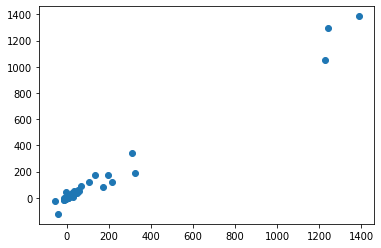

In [138]:
plt.scatter(x=frame['prediction_EBIT'], y=frame['real_value_EBIT'])
plt.show()

In [154]:
#start regression for other features

#IQ_TOTAL_OTHER_OPER, IQ_EBIT, IQ_OPER_INC IQ_TOTAL_REV

set_reg=wide_formatset.loc[:, ('company','year','IQ_TOTAL_OTHER_OPER')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

277


(array([1.417e+03, 3.700e+01, 1.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-182.30989 ,  226.225399,  634.760688, 1043.295977, 1451.831266,
        1860.366555, 2268.901844, 2677.437133, 3085.972422, 3494.507711,
        3903.043   ]),
 <a list of 10 Patch objects>)

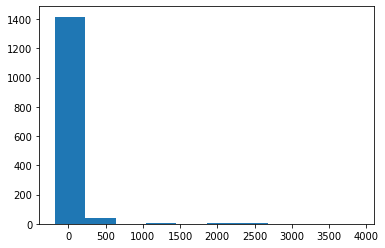

In [155]:
plt.hist(set_reg.IQ_TOTAL_OTHER_OPER)

In [156]:
min(set_reg.IQ_TOTAL_OTHER_OPER) , max(set_reg.IQ_TOTAL_OTHER_OPER)

(-182.30989, 3903.0429999999997)

In [157]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_TOTAL_OTHER_OPER')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_TOTAL_OTHER_OPER[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_TOTAL_OTHER_OPER[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
no information for 2018 IQ35143670
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [158]:
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_TOTAL_OPER','real_value_TOTAL_OPER','slope_TOTAL_OPER','intercept','year', 'n_years_model'))
frame_op['residuals_TOTAL_OPER']=frame_op['prediction_TOTAL_OPER']-frame_op['real_value_TOTAL_OPER']

In [159]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

In [160]:
len(frame_op.company)

263

In [161]:
#IQ_TOTAL_OTHER_OPER is the year 2017 value

frame_total=pd.merge(frame, frame_op.loc[:,['company', 'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept', 'n_years_model',
       'residuals_TOTAL_OPER', 'IQ_TOTAL_OTHER_OPER']], on='company')

In [162]:
frame_total.head()

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,slope_TOTAL_OPER,intercept_y,n_years_model_y,residuals_TOTAL_OPER,IQ_TOTAL_OTHER_OPER
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],[0.5445],-1094.293000,4,[-1.2669999999999622],3.956000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],[0.5951],-1189.428100,6,[-2.521300000000002],11.919000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],[64.36350000000003],-129504.347500,6,[17.28250000000162],312.009000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],[0.6645222000000001],-1335.372148,6,[0.052774599999893645],5.506852
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],[3.5954999999999986],-7220.365333,4,[-11.597333333333133],33.476000


In [163]:
frame_op.columns.values

array(['company', 'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept', 'year_x', 'n_years_model',
       'residuals_TOTAL_OPER', 'year_y', 'IQ_TOTAL_OTHER_OPER'],
      dtype=object)

In [164]:

#IQ_TOTAL_OTHER_OPER, IQ_EBIT, IQ_OPER_INC IQ_TOTAL_REV

set_reg=wide_formatset.loc[:, ('company','year','IQ_OPER_INC')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

277


(array([1.000e+00, 1.000e+00, 0.000e+00, 1.447e+03, 1.900e+01, 1.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([-669.315 , -485.2043, -301.0936, -116.9829,   67.1278,  251.2385,
         435.3492,  619.4599,  803.5706,  987.6813, 1171.792 ]),
 <a list of 10 Patch objects>)

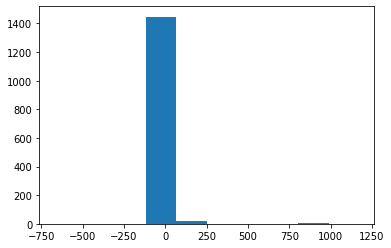

In [165]:
plt.hist(set_reg.IQ_OPER_INC)

In [166]:
min(set_reg.IQ_OPER_INC) , max(set_reg.IQ_OPER_INC)

(-669.315, 1171.792)

In [167]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_OPER_INC')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_OPER_INC[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_OPER_INC[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [168]:
list_
frame_op_inc=pd.DataFrame(list_, columns=('company','prediction_OPER_INC','real_value_OPER_INC','slope_OPER_INC','intercept','year', 'n_years_model'))
frame_op_inc['residuals_OPER_INC']=frame_op_inc['prediction_OPER_INC']-frame_op_inc['real_value_OPER_INC']

In [169]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_op_inc=pd.merge(frame_op_inc,set_reg_2017, on='company' )

In [170]:

frame_total=pd.merge(frame_total, frame_op_inc.loc[:,['company', 'prediction_OPER_INC', 'real_value_OPER_INC',
       'slope_OPER_INC', 'intercept', 'n_years_model',
       'residuals_OPER_INC', 'IQ_OPER_INC']], on='company')

In [171]:
frame_total

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,...,n_years_model_y,residuals_TOTAL_OPER,IQ_TOTAL_OTHER_OPER,prediction_OPER_INC,real_value_OPER_INC,slope_OPER_INC,intercept,n_years_model,residuals_OPER_INC,IQ_OPER_INC
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],...,4,[-1.2669999999999622],3.956000,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,4,[0.44533333333329295],1.691000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],...,6,[-2.521300000000002],11.919000,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,6,[2.8910000000000946],3.543000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],...,6,[17.28250000000162],312.009000,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,6,[30.422499999997484],-74.577000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],...,6,[0.052774599999893645],5.506852,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,6,[0.2181730999999999],-0.539657
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],...,4,[-11.597333333333133],33.476000,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,4,[8.32333333333378],10.075000
5,IQ105708162,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,2018.0,6,[0.3277393999999997],[12.431576100000257],[13.105929],...,6,[-0.674352899999743],11.581359,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,6,[0.3277393999999997],-0.390303
6,IQ1058799,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,2018.0,6,[-0.46792940000030825],[19.465223100000003],[18.336739],...,6,[1.1284841000000014],19.599737,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,6,[-0.46792940000030825],7.872432
7,IQ106487857,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,2018.0,6,[-5.00209999999981],[95.97919999999795],[228.174],...,6,[-132.19480000000206],83.565000,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,6,[-5.00209999999981],24.469000
8,IQ106623823,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,2018.0,6,[8.564591200000397],[15.74799830000029],[17.110083],...,6,[-1.3620846999997092],14.559392,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,6,[8.564591200000397],9.656718
9,IQ106833868,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,2018.0,6,[-3.265200000000397],[19.02009999999973],[21.026],...,6,[-2.0059000000002705],28.672000,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,6,[-3.265200000000397],-9.684000


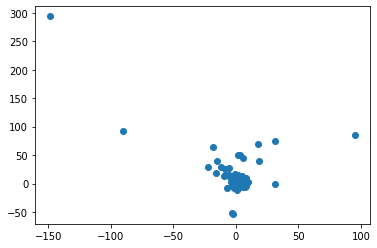

In [172]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_TOTAL_OPER'])
plt.show()

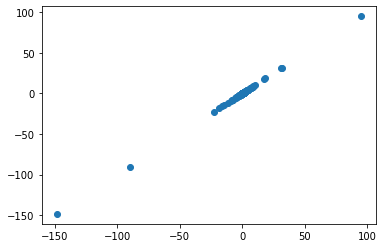

In [173]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_OPER_INC'])
plt.show()

277


(array([1.452e+03, 8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 6.000e+00, 3.000e+00]),
 array([8.60000000e-04, 7.87722874e+02, 1.57544489e+03, 2.36316690e+03,
        3.15088892e+03, 3.93861093e+03, 4.72633294e+03, 5.51405496e+03,
        6.30177697e+03, 7.08949899e+03, 7.87722100e+03]),
 <a list of 10 Patch objects>)

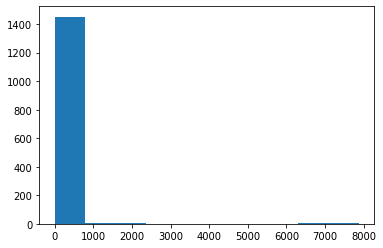

In [174]:
#need to do IQ_TOTAL_REV
set_reg=wide_formatset.loc[:, ('company','year','IQ_TOTAL_REV')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_TOTAL_REV)

In [175]:
min(set_reg.IQ_TOTAL_REV) , max(set_reg.IQ_TOTAL_REV)

(0.00086, 7877.221)

In [176]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_TOTAL_REV')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_TOTAL_REV[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_TOTAL_REV[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [177]:

list_
frame_total_rev=pd.DataFrame(list_, columns=('company','prediction_TOTAL_REV','real_value_TOTAL_REV','slope_TOTAL_REV','intercept','year', 'n_years_model'))
frame_total_rev['residuals_TOTAL_REV']=frame_total_rev['prediction_TOTAL_REV']-frame_total_rev['real_value_TOTAL_REV']

In [178]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_total_rev=pd.merge(frame_total_rev,set_reg_2017, on='company' )

In [179]:
frame_total=pd.merge(frame_total, frame_total_rev.loc[:,['company', 'prediction_TOTAL_REV', 'real_value_TOTAL_REV',
       'slope_TOTAL_REV', 'intercept', 'n_years_model',
       'residuals_TOTAL_REV', 'IQ_TOTAL_REV']], on='company')

In [180]:
frame_total

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,...,n_years_model_x,residuals_OPER_INC,IQ_OPER_INC,prediction_TOTAL_REV,real_value_TOTAL_REV,slope_TOTAL_REV,intercept_y,n_years_model_y,residuals_TOTAL_REV,IQ_TOTAL_REV
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],...,4,[0.44533333333329295],1.691000,[6.340666666666721],[7.379],[0.936],-1882.507333,4,[-1.038333333333279],5.841000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],...,6,[2.8910000000000946],3.543000,[26.972200000000157],[24.316],[2.2992000000000004],-4612.813400,6,[2.656200000000158],25.579000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],...,6,[30.422499999997484],-74.577000,[450.2949999999837],[392.00800000000004],[67.93660000000001],-136645.763800,6,[58.286999999983664],355.856000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],...,6,[0.2181730999999999],-0.539657,[8.592850799999951],[8.416115],[0.8039680000000001],-1613.814573,6,[0.17673579999995148],8.188910
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],...,4,[8.32333333333378],10.075000,[53.63366666666661],[57.708999999999996],[7.807999999999999],-15702.910333,4,[-4.075333333333383],44.558000
5,IQ105708162,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,2018.0,6,[0.3277393999999997],[12.431576100000257],[13.105929],...,6,[0.3277393999999997],-0.390303,[12.264374299999872],[12.989053],[1.8264111000000003],-3673.433226,6,[-0.724678700000128],11.451703
6,IQ1058799,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,2018.0,6,[-0.46792940000030825],[19.465223100000003],[18.336739],...,6,[-0.46792940000030825],7.872432,[74.08652190000066],[73.93571999999999],[2.2061828999999995],-4377.990570,6,[0.15080190000067262],71.185360
7,IQ106487857,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,2018.0,6,[-5.00209999999981],[95.97919999999795],[228.174],...,6,[-5.00209999999981],24.469000,[122.97210000000268],[260.16900000000004],[-9.898300000000004],20097.741500,6,[-137.19689999999736],108.034000
8,IQ106623823,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,2018.0,6,[8.564591200000397],[15.74799830000029],[17.110083],...,6,[8.564591200000397],9.656718,[64.95204219999869],[51.776295000000005],[8.8101348],-17713.899984,6,[13.175747199998682],55.914886
9,IQ106833868,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,2018.0,6,[-3.265200000000397],[19.02009999999973],[21.026],...,6,[-3.265200000000397],-9.684000,[12.983299999999872],[19.464000000000002],[-3.8207000000000004],7723.155900,6,[-6.48070000000013],19.390000


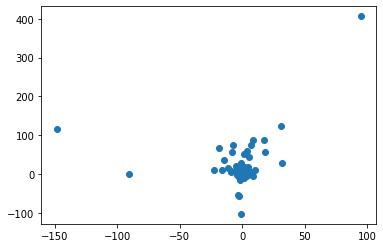

In [181]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_TOTAL_REV'])
plt.show()

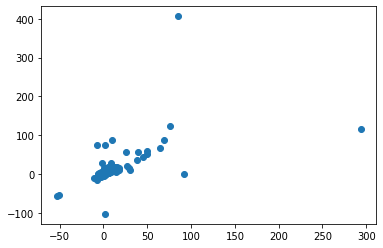

In [182]:
plt.scatter(x=frame_total['slope_TOTAL_OPER'], y=frame_total['slope_TOTAL_REV'])
plt.show()

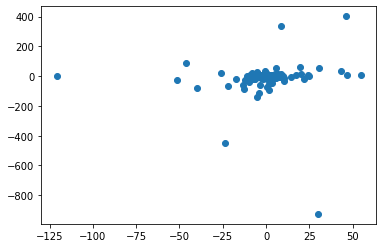

In [183]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_TOTAL_REV'])
plt.show()

In [184]:
frame_total.columns.values

array(['company', 'prediction_EBIT', 'real_value_EBIT', 'slope_EBIT',
       'intercept_x', 'year', 'n_years_model_x', 'residuals_EBIT',
       'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept_y', 'n_years_model_y',
       'residuals_TOTAL_OPER', 'IQ_TOTAL_OTHER_OPER',
       'prediction_OPER_INC', 'real_value_OPER_INC', 'slope_OPER_INC',
       'intercept_x', 'n_years_model_x', 'residuals_OPER_INC',
       'IQ_OPER_INC', 'prediction_TOTAL_REV', 'real_value_TOTAL_REV',
       'slope_TOTAL_REV', 'intercept_y', 'n_years_model_y',
       'residuals_TOTAL_REV', 'IQ_TOTAL_REV'], dtype=object)

In [185]:
frame_total.to_csv('dataframe_slopes_for_features.csv')

277


(-865.097, 4200.7570000000005)

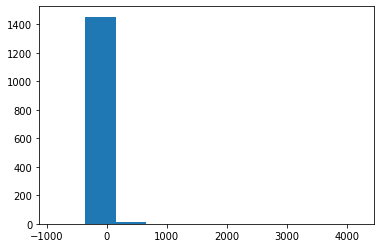

In [186]:
set_reg=wide_formatset.loc[:, ('company','year','IQ_NI')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_NI)
min(set_reg.IQ_NI), max(set_reg.IQ_NI)

In [187]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_NI')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_NI[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_NI[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_NI','real_value_NI','slope_NI','intercept','year', 'n_years_model'))
frame_op['residuals_NI']=frame_op['prediction_NI']-frame_op['real_value_NI']
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

frame_total=pd.merge(frame_total, frame_op.loc[:,['company', 'prediction_NI', 'real_value_NI',
       'slope_NI', 'intercept', 'n_years_model',
       'residuals_NI', 'IQ_NI']], on='company')

company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ433225882
company with not enough datapoints IQ589308959
company with not enough datapoints IQ751626


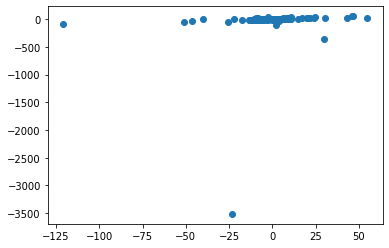

In [188]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_NI'])
plt.show()

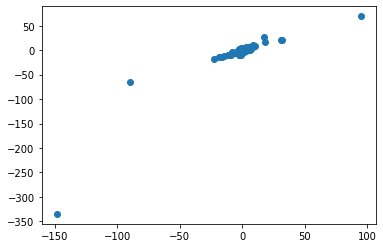

In [189]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_NI'])
plt.show()

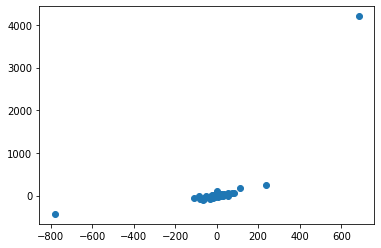

In [190]:
plt.scatter(x=frame_total['prediction_NI'], y=frame_total['real_value_NI'])
plt.show()

277


(-7.599536, 3920.202)

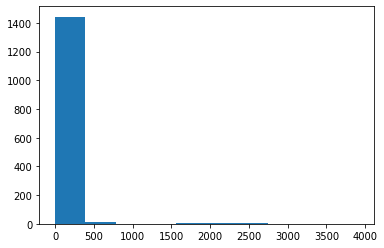

In [191]:
set_reg=wide_formatset.loc[:, ('company','year','IQ_GP')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_GP)
min(set_reg.IQ_GP), max(set_reg.IQ_GP)

In [192]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_GP')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_GP[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_GP[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_GP','real_value_GP','slope_GP','intercept','year', 'n_years_model'))
frame_op['residuals_GP']=frame_op['prediction_GP']-frame_op['real_value_GP']
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

frame_total=pd.merge(frame_total, frame_op.loc[:,['company', 'prediction_GP', 'real_value_GP',
       'slope_GP', 'intercept', 'n_years_model',
       'residuals_GP', 'IQ_GP']], on='company')

company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


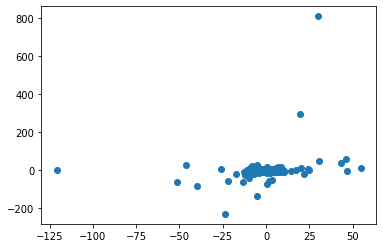

In [193]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_GP'])
plt.show()

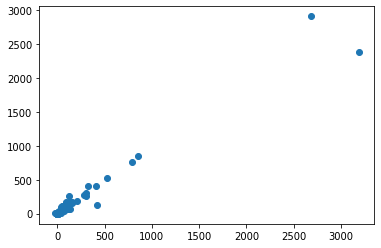

In [194]:
plt.scatter(x=frame_total['prediction_GP'], y=frame_total['real_value_GP'])
plt.show()

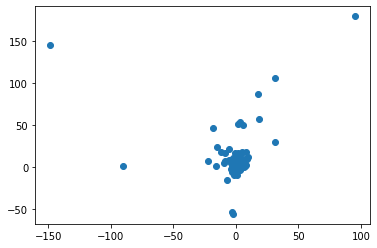

In [195]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_GP'])
plt.show()

In [196]:
##here starts the regression for each company in the balance sheets

wide_formatset=pd.read_csv(pub_input_IS)
wide_formatset.columns

Index(['Unnamed: 0', 'company', 'date', 'year', 'quarter',
       'IQ_ACCUM_AMORT_INTAN_ASSETS', 'IQ_AD', 'IQ_AE', 'IQ_AP', 'IQ_APIC',
       'IQ_AR', 'IQ_AVG_EMPLOYEES', 'IQ_BV_SHARE', 'IQ_CAPITAL_LEASES',
       'IQ_CASH_EQUIV', 'IQ_CASH_SHARE', 'IQ_CASH_ST_INVEST', 'IQ_COMMON',
       'IQ_CONTINGENT_LIABILITIES', 'IQ_COST_BORROWING', 'IQ_CURRENT_PORT',
       'IQ_CURRENT_PORT_DEBT', 'IQ_CURRENT_PORT_LEASES', 'IQ_DEF_CHARGES_LT',
       'IQ_DEF_TAX_LIAB_LT', 'IQ_EQUITY_METHOD', 'IQ_FULL_TIME', 'IQ_GPPE',
       'IQ_GROSS_INTAN_ASSETS', 'IQ_GW', 'IQ_GW_INTAN',
       'IQ_INC_TAX_PAY_CURRENT', 'IQ_INVENTORY', 'IQ_LT_DEBT', 'IQ_LT_INVEST',
       'IQ_MACHINERY', 'IQ_NET_DEBT', 'IQ_NET_WORKING_CAP', 'IQ_NPPE',
       'IQ_OTHER_ASSETS', 'IQ_OTHER_CA', 'IQ_OTHER_CA_SUPPL', 'IQ_OTHER_CL',
       'IQ_OTHER_CL_SUPPL', 'IQ_OTHER_EQUITY', 'IQ_OTHER_INTAN',
       'IQ_OTHER_INV', 'IQ_OTHER_LIAB', 'IQ_OTHER_LIAB_LT',
       'IQ_OTHER_LT_ASSETS', 'IQ_OTHER_RECEIV', 'IQ_PART_TIME', 'IQ_PENSION',
  

277


(0.005, 483879.0)

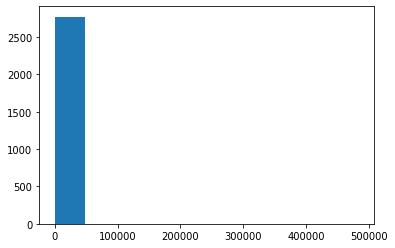

In [197]:
set_reg=wide_formatset.loc[:, ('company','year','IQ_TOTAL_ASSETS')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_TOTAL_ASSETS)
min(set_reg.IQ_TOTAL_ASSETS), max(set_reg.IQ_TOTAL_ASSETS)

In [198]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_TOTAL_ASSETS')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_TOTAL_ASSETS[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_TOTAL_ASSETS[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_IQ_TOTAL_ASSETS','real_value_IQ_TOTAL_ASSETS','slope_IQ_TOTAL_ASSETS','intercept','year', 'n_years_model'))
frame_op['residuals_IQ_TOTAL_ASSETS']=frame_op['prediction_IQ_TOTAL_ASSETS']-frame_op['real_value_IQ_TOTAL_ASSETS']
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

frame_total=pd.merge(frame_total, frame_op.loc[:,['company', 'prediction_IQ_TOTAL_ASSETS', 'real_value_IQ_TOTAL_ASSETS',
       'slope_IQ_TOTAL_ASSETS', 'intercept', 'n_years_model',
       'residuals_IQ_TOTAL_ASSETS', 'IQ_TOTAL_ASSETS']], on='company')

company with not enough datapoints IQ116787880
no information for 2018 IQ128568
no information for 2018 IQ20356331
no information for 2018 IQ22103794
company with not enough datapoints IQ234149600
no information for 2018 IQ252737059
no information for 2018 IQ29594513
no information for 2018 IQ29688418
company with not enough datapoints IQ331114888
no information for 2018 IQ39393440
no information for 2018 IQ40384020
no information for 2018 IQ42083070
company with not enough datapoints IQ433136404
no information for 2018 IQ4484339
no information for 2018 IQ4806734
no information for 2018 IQ530385
company with not enough datapoints IQ589308959
no information for 2018 IQ671554
no information for 2018 IQ716329
no information for 2018 IQ8080920


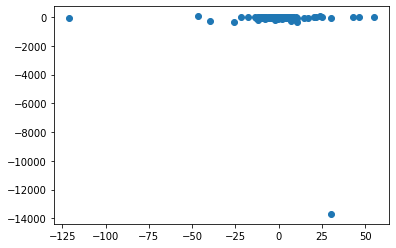

In [199]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_IQ_TOTAL_ASSETS'])
plt.show()

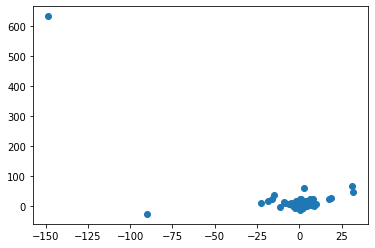

In [200]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_IQ_TOTAL_ASSETS'])
plt.show()

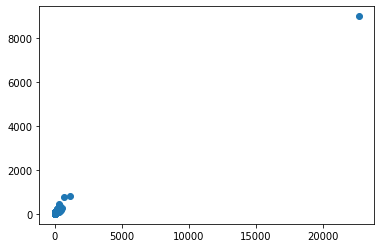

In [201]:
plt.scatter(x=frame_total['real_value_IQ_TOTAL_ASSETS'], y=frame_total['prediction_IQ_TOTAL_ASSETS'])

268


(-0.255, 210583.0)

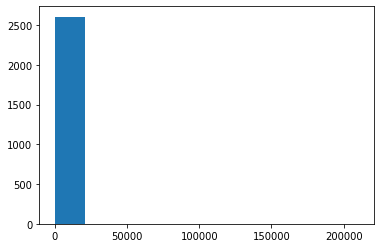

In [202]:
set_reg=wide_formatset.loc[:, ('company','year','IQ_AR')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_AR )
min(set_reg.IQ_AR ), max(set_reg.IQ_AR )

In [203]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_AR')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_AR[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_AR[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_IQ_AR','real_value_IQ_AR','slope_IQ_AR','intercept','year', 'n_years_model'))
frame_op['residuals_IQ_AR']=frame_op['prediction_IQ_AR']-frame_op['real_value_IQ_AR']
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

frame_total=pd.merge(frame_total, frame_op.loc[:,['company', 'prediction_IQ_AR', 'real_value_IQ_AR',
       'slope_IQ_AR', 'intercept', 'n_years_model',
       'residuals_IQ_AR', 'IQ_AR']], on='company')

no information for 2018 IQ113333300
no information for 2018 IQ114671457
company with not enough datapoints IQ116787880
no information for 2018 IQ117439856
no information for 2018 IQ128568
no information for 2018 IQ13471413
no information for 2018 IQ20356331
company with not enough datapoints IQ2081659
no information for 2018 IQ2105390
no information for 2018 IQ22103794
company with not enough datapoints IQ234149600
no information for 2018 IQ252737059
no information for 2018 IQ29594513
no information for 2018 IQ29688418
company with not enough datapoints IQ331114888
company with not enough datapoints IQ33734642
no information for 2018 IQ39393440
no information for 2018 IQ40384020
no information for 2018 IQ42083070
no information for 2018 IQ428963
company with not enough datapoints IQ433136404
no information for 2018 IQ4484339
no information for 2018 IQ46975364
no information for 2018 IQ4806734
no information for 2018 IQ51853988
no information for 2018 IQ530385
no information for 2018 IQ

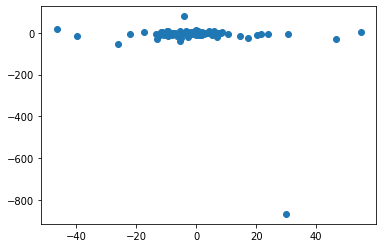

In [204]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_IQ_AR'])
plt.show()

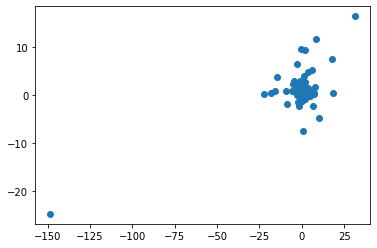

In [205]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_IQ_AR'])
plt.show()

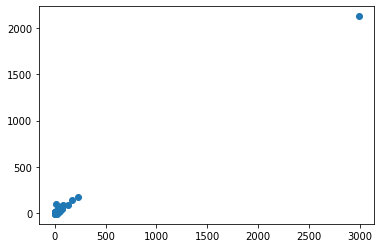

In [206]:
plt.scatter(x=frame_total['real_value_IQ_AR'], y=frame_total['prediction_IQ_AR'])
plt.show()

In [208]:
frame_total.to_csv('dataframe_slopes_for_features_income_balance.csv')